In [1]:
import pandas as pd
import polars as pl
import polars.selectors as cs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import umap

import warnings
warnings.filterwarnings('ignore') 

In [2]:
%run -i "EDA_utils.py"

In [3]:
df = pd.read_csv("./creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df= pl.from_dataframe(df)
df.schema

Schema([('Time', Float64),
        ('V1', Float64),
        ('V2', Float64),
        ('V3', Float64),
        ('V4', Float64),
        ('V5', Float64),
        ('V6', Float64),
        ('V7', Float64),
        ('V8', Float64),
        ('V9', Float64),
        ('V10', Float64),
        ('V11', Float64),
        ('V12', Float64),
        ('V13', Float64),
        ('V14', Float64),
        ('V15', Float64),
        ('V16', Float64),
        ('V17', Float64),
        ('V18', Float64),
        ('V19', Float64),
        ('V20', Float64),
        ('V21', Float64),
        ('V22', Float64),
        ('V23', Float64),
        ('V24', Float64),
        ('V25', Float64),
        ('V26', Float64),
        ('V27', Float64),
        ('V28', Float64),
        ('Amount', Float64),
        ('Class', Int64)])

In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

shape: (9, 32)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Time      ┆ V1        ┆ V2        ┆ … ┆ V27       ┆ V28       ┆ Amount    ┆ Class    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 284807.0  ┆ 284807.0  ┆ 284807.0  ┆ … ┆ 284807.0  ┆ 284807.0  ┆ 284807.0  ┆ 284807.0 │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ 94813.859 ┆ 1.1307e-1 ┆ 3.6644e-1 ┆ … ┆ -3.5062e- ┆ -1.1137e- ┆ 88.349619 ┆ 0.001727 │
│           ┆ 575       ┆ 5         ┆ 6         ┆   ┆ 16        ┆ 16        ┆           ┆          │
│ std       ┆ 47488.145 ┆ 1.958696  ┆ 1.651309  ┆ … ┆ 0.403632  ┆ 0.330083  ┆ 250.12010 ┆ 0.041527 │
│           ┆ 955       ┆           ┆           ┆   ┆           ┆           ┆ 9         ┆          │
│ min       ┆ 0.0       ┆ -56.40751 ┆ -72.71572 ┆ … ┆ -22.56567 ┆ -15.43008 ┆ 0.0       ┆ 0.0      │
│           ┆           ┆           ┆ 8         ┆   ┆ 9         ┆ 4         ┆           ┆          │
│ 25%       ┆ 54202.0   ┆ -0.920372 ┆ -0.598545 ┆ … ┆ -0.070839 ┆ -0.052959 ┆ 5.6       ┆ 0.0      │
│ 50%       ┆ 84692.0   ┆ 0.018109  ┆ 0.065486  ┆ … ┆ 0.001342  ┆ 0.011244  ┆ 22.0      ┆ 0.0      │
│ 75%       ┆ 139321.0  ┆ 1.315648  ┆ 0.803728  ┆ … ┆ 0.091046  ┆ 0.078281  ┆ 77.17     ┆ 0.0      │
│ max       ┆ 172792.0  ┆ 2.45493   ┆ 22.057729 ┆ … ┆ 31.612198 ┆ 33.847808 ┆ 25691.16  ┆ 1.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

- The mean of transaction amount is relatively small(~ $88.35).
- There are no missing values. 

let's see the distribution of the target value:

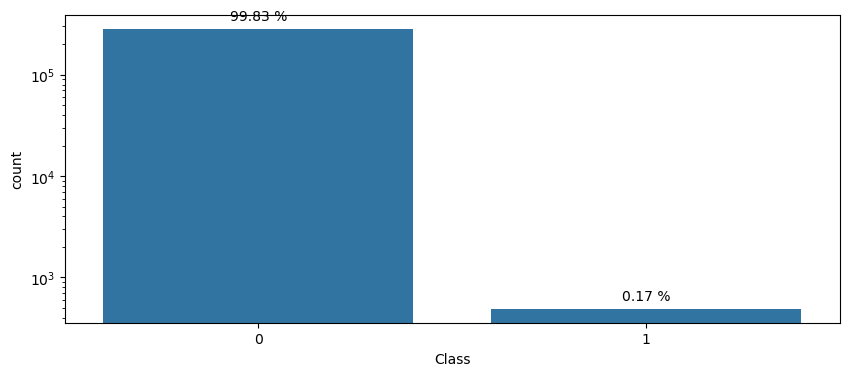

In [7]:
pl_barplot("Class",df, x_rot=0)

In [8]:
pl_valueCounts_perc("Class",df)

shape: (2, 3)
┌───────┬────────┬──────────────┐
│ Class ┆ count  ┆ percentage % │
│ ---   ┆ ---    ┆ ---          │
│ i64   ┆ u32    ┆ f64          │
╞═══════╪════════╪══════════════╡
│ 0     ┆ 284315 ┆ 99.83        │
│ 1     ┆ 492    ┆ 0.17         │
└───────┴────────┴──────────────┘

We have a highly imbalanced data, i.e., only 0.17% of transaction are fraudulent. 
- Since the minority class is rare, we will later be using the autoencoders for anomaly detection!
- The goal is to traind the autoencoder on the majority class (non-fradulant) only so that it can detect anomalous (minority) class.
- Why this works well with imbalanced data:
    - You don’t need to balance the classes
    - You’re not modeling the minority class directly (which is sparse and hard to learn)
    - You're using a generative approach (learn what “normal” looks like and detect deviations)

# Data exploration

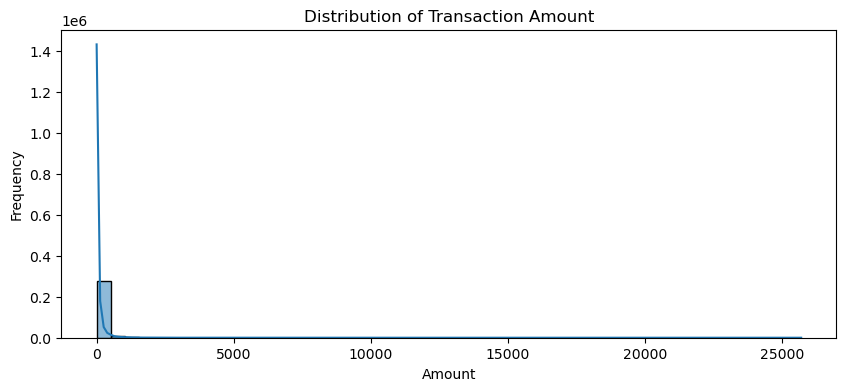

In [9]:
# Distribution of the 'Amount' feature
plt.figure(figsize=(10,4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

The amount feature is highly skewed.

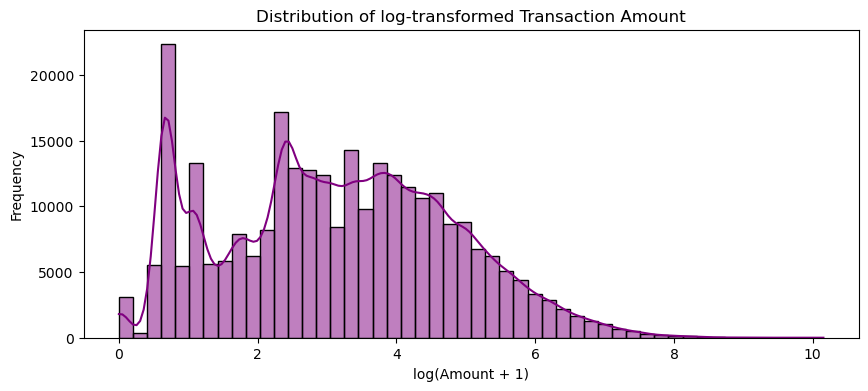

In [10]:
# Log transform the 'Amount' to reduce skewness and plot
plt.figure(figsize=(10,4))
sns.histplot(np.log1p(df["Amount"]), bins=50, kde=True, color="purple")
plt.title("Distribution of log-transformed Transaction Amount")
plt.xlabel("log(Amount + 1)")
plt.ylabel("Frequency")
plt.show()

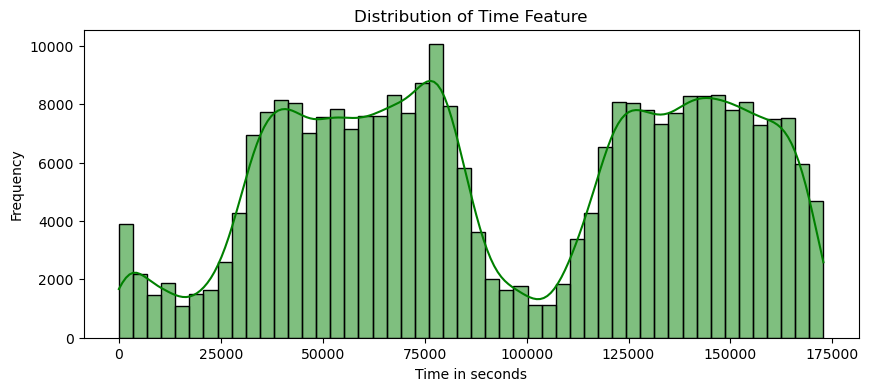

In [11]:
# Distribution of 'Time'
plt.figure(figsize=(10,4))
sns.histplot(df["Time"], bins=50, kde=True, color="green")
plt.title("Distribution of Time Feature")
plt.xlabel("Time in seconds")
plt.ylabel("Frequency")
plt.show()

- Variance Inflation Factor (VIF) is used to detect multicollinearity in a regression model. It quantifies how much the variance of a regression coefficient is inflated due to collinearity among predictors.
    - VIF = 1 → No multicollinearity (ideal scenario).
    - VIF between 1 and 5 → Low to moderate multicollinearity, generally acceptable.
    - VIF between 5 and 10 → High multicollinearity, potential concern.
    - VIF > 10 → Severe multicollinearity; strong correlation among predictors, making coefficient estimates unstable.

In [12]:
# VIF dataframe
vif_df = return_VIF(df=df, target_col="Class")
vif_df

Feature        VIF
29     Amount  12.116701
30  intercept  10.065370
2          V2   4.422390
7          V7   2.929040
5          V5   2.859316
20        V20   2.399180
0        Time   1.879865
3          V3   1.877342
1          V1   1.651908
6          V6   1.571530
23        V23   1.158142
21        V21   1.140305
4          V4   1.138061
8          V8   1.131633
25        V25   1.130801
10        V10   1.126333
11        V11   1.115328
22        V22   1.089101
15        V15   1.063421
19        V19   1.039643
14        V14   1.031854
18        V18   1.031048
12        V12   1.030070
9          V9   1.023894
17        V17   1.010701
27        V27   1.010105
13        V13   1.008474
26        V26   1.003359
28        V28   1.001433
24        V24   1.000806
16        V16   1.000448

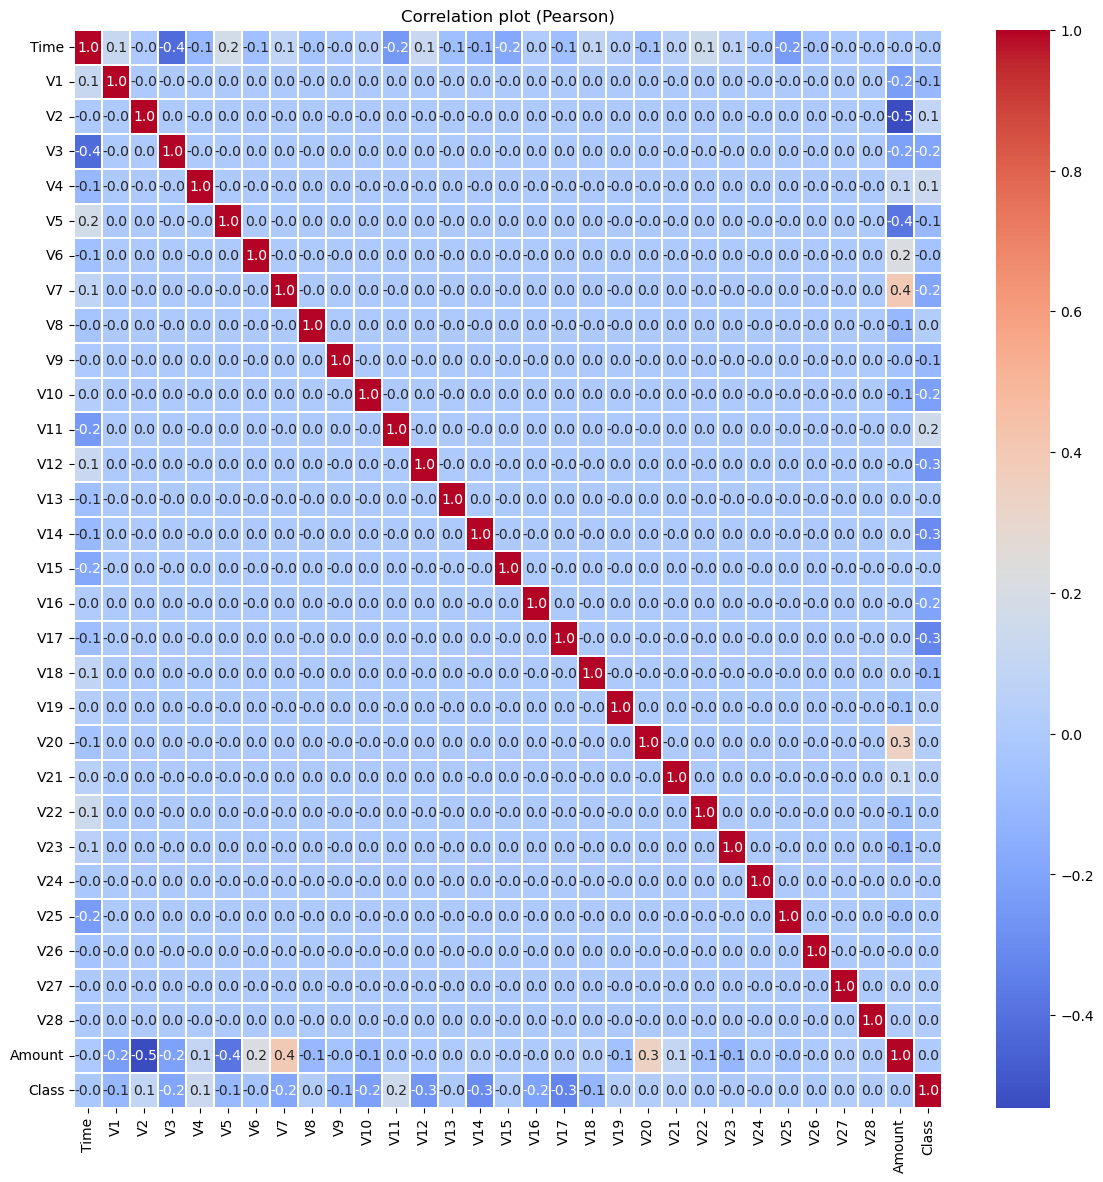

In [13]:
plt.figure(figsize = (14,14))
plt.title('Correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    linewidths=.12,
    cmap="coolwarm",
    annot=True,
    fmt=".1f"
)
plt.show()

Based on the correlation heatmap plot:
- there is no notable correlation between features V1-V28.
    - Note: This is expected since per columns description described in the data set [Kaggle link](https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models/input), principal components are computed to be orthogonal which means they are uncorrelated (i.e. there is no multicollinearity in the linear sense).
- Time has inverse correlation with V3.
- Amount has inverse correlation with V2, V5.
- Amount has correlation with V7.

##  Feature Distribution per class

Lets see the distribution of each features for both fraud and non-fraud transactions.
We would like to check if the feature helps separate the classes.

In [14]:
# split data to fraud and non-fraud
df_non_fraud= df.filter(pl.col("Class")==0)
df_fraud= df.filter(pl.col("Class")==1)

In [15]:
df_non_fraud.describe()

shape: (9, 32)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Time      ┆ V1        ┆ V2        ┆ … ┆ V27       ┆ V28       ┆ Amount    ┆ Class    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 284315.0  ┆ 284315.0  ┆ 284315.0  ┆ … ┆ 284315.0  ┆ 284315.0  ┆ 284315.0  ┆ 284315.0 │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ 94838.202 ┆ 0.008258  ┆ -0.006271 ┆ … ┆ -0.000295 ┆ -0.000131 ┆ 88.291022 ┆ 0.0      │
│           ┆ 258       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ std       ┆ 47484.015 ┆ 1.929814  ┆ 1.636146  ┆ … ┆ 0.399847  ┆ 0.32957   ┆ 250.10509 ┆ 0.0      │
│           ┆ 786       ┆           ┆           ┆   ┆           ┆           ┆ 2         ┆          │
│ min       ┆ 0.0       ┆ -56.40751 ┆ -72.71572 ┆ … ┆ -22.56567 ┆ -15.43008 ┆ 0.0       ┆ 0.0      │
│           ┆           ┆           ┆ 8         ┆   ┆ 9         ┆ 4         ┆           ┆          │
│ 25%       ┆ 54230.0   ┆ -0.917535 ┆ -0.599465 ┆ … ┆ -0.070852 ┆ -0.052949 ┆ 5.65      ┆ 0.0      │
│ 50%       ┆ 84711.0   ┆ 0.020023  ┆ 0.06407   ┆ … ┆ 0.00123   ┆ 0.011199  ┆ 22.0      ┆ 0.0      │
│ 75%       ┆ 139333.0  ┆ 1.316224  ┆ 0.800448  ┆ … ┆ 0.090573  ┆ 0.077963  ┆ 77.05     ┆ 0.0      │
│ max       ┆ 172792.0  ┆ 2.45493   ┆ 18.902453 ┆ … ┆ 31.612198 ┆ 33.847808 ┆ 25691.16  ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [16]:
df_fraud.describe()

shape: (9, 32)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬────────────┬───────┐
│ statistic  ┆ Time       ┆ V1        ┆ V2        ┆ … ┆ V27       ┆ V28       ┆ Amount     ┆ Class │
│ ---        ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---        ┆ ---   │
│ str        ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64        ┆ f64   │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪════════════╪═══════╡
│ count      ┆ 492.0      ┆ 492.0     ┆ 492.0     ┆ … ┆ 492.0     ┆ 492.0     ┆ 492.0      ┆ 492.0 │
│ null_count ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0        ┆ 0.0   │
│ mean       ┆ 80746.8069 ┆ -4.771948 ┆ 3.623778  ┆ … ┆ 0.170575  ┆ 0.075667  ┆ 122.211321 ┆ 1.0   │
│            ┆ 11         ┆           ┆           ┆   ┆           ┆           ┆            ┆       │
│ std        ┆ 47835.3651 ┆ 6.783687  ┆ 4.291216  ┆ … ┆ 1.376766  ┆ 0.547291  ┆ 256.683288 ┆ 0.0   │
│            ┆ 38         ┆           ┆           ┆   ┆           ┆           ┆            ┆       │
│ min        ┆ 406.0      ┆ -30.55238 ┆ -8.402154 ┆ … ┆ -7.263482 ┆ -1.86929  ┆ 0.0        ┆ 1.0   │
│ 25%        ┆ 41243.0    ┆ -6.003422 ┆ 1.189757  ┆ … ┆ -0.019579 ┆ -0.106667 ┆ 1.0        ┆ 1.0   │
│ 50%        ┆ 75581.0    ┆ -2.335655 ┆ 2.719882  ┆ … ┆ 0.395171  ┆ 0.146793  ┆ 9.29       ┆ 1.0   │
│ 75%        ┆ 128471.0   ┆ -0.41982  ┆ 4.960892  ┆ … ┆ 0.824685  ┆ 0.380246  ┆ 105.89     ┆ 1.0   │
│ max        ┆ 170348.0   ┆ 2.132386  ┆ 22.057729 ┆ … ┆ 3.052358  ┆ 1.779364  ┆ 2125.87    ┆ 1.0   │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴────────────┴───────┘

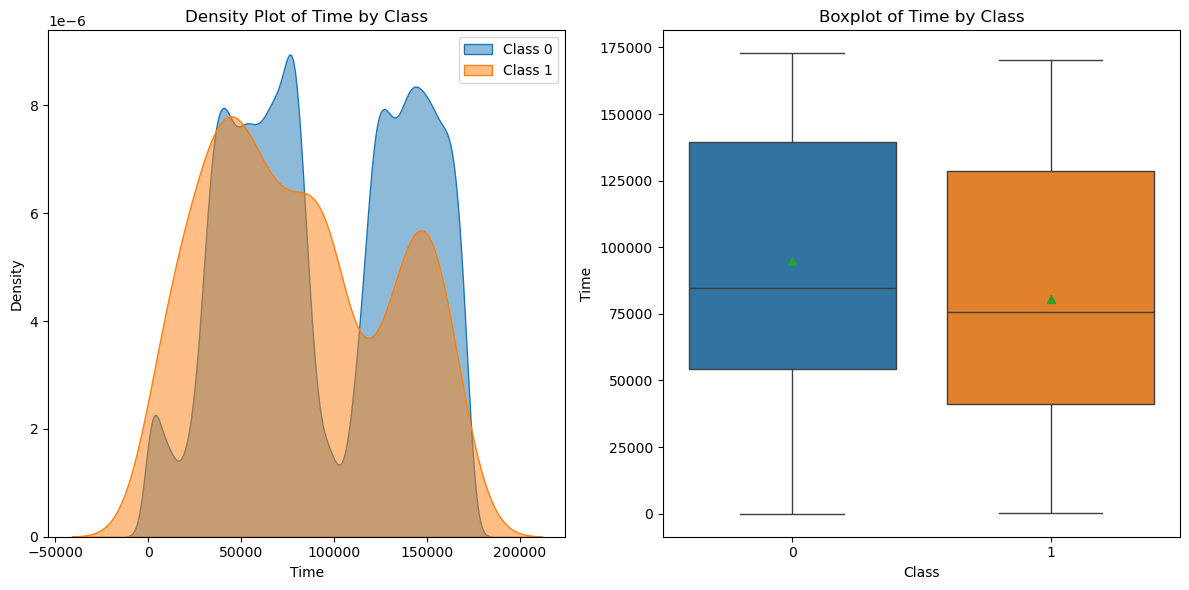

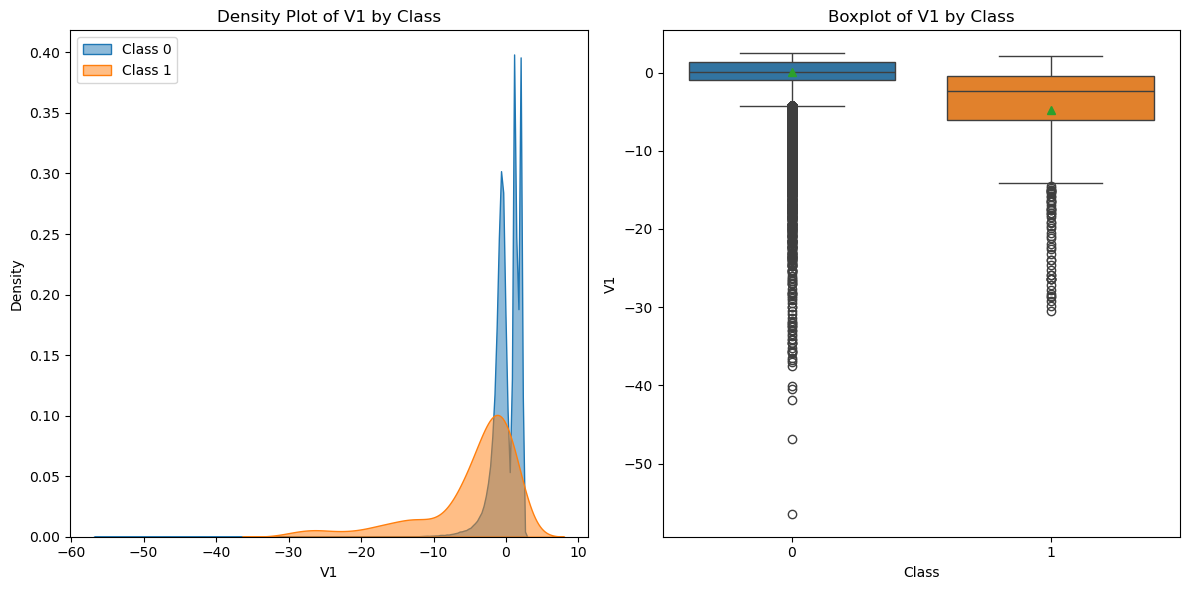

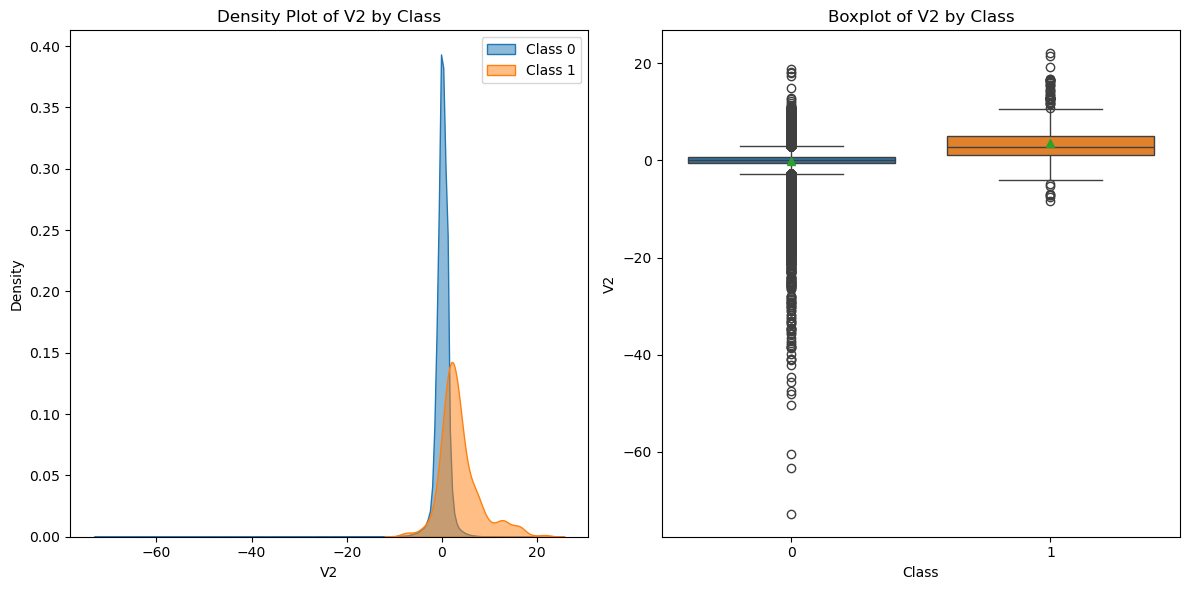

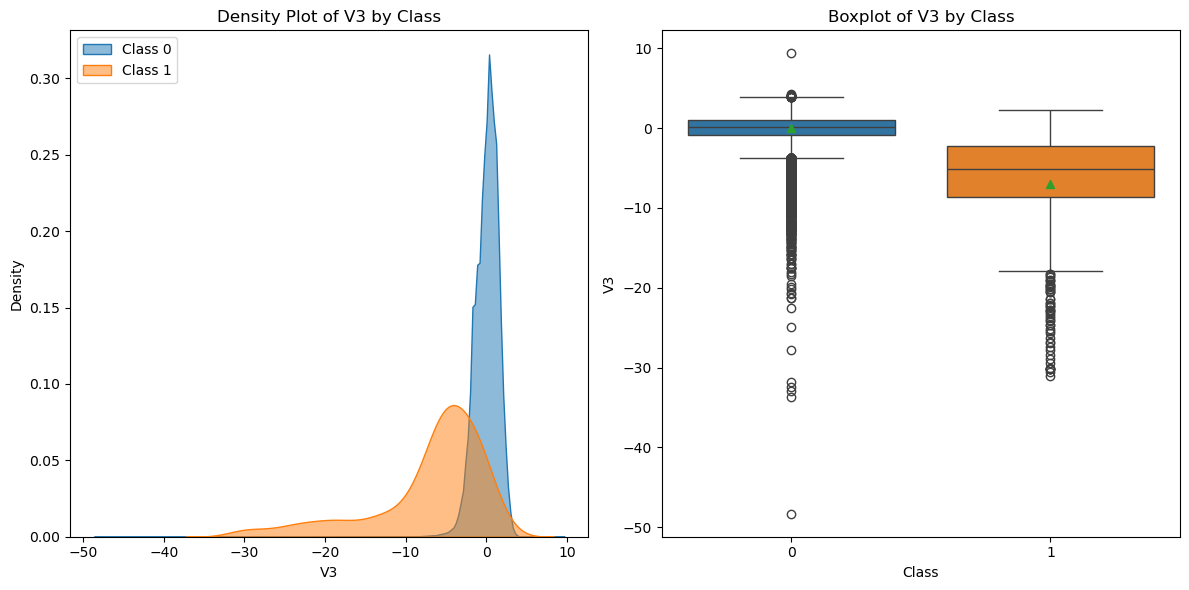

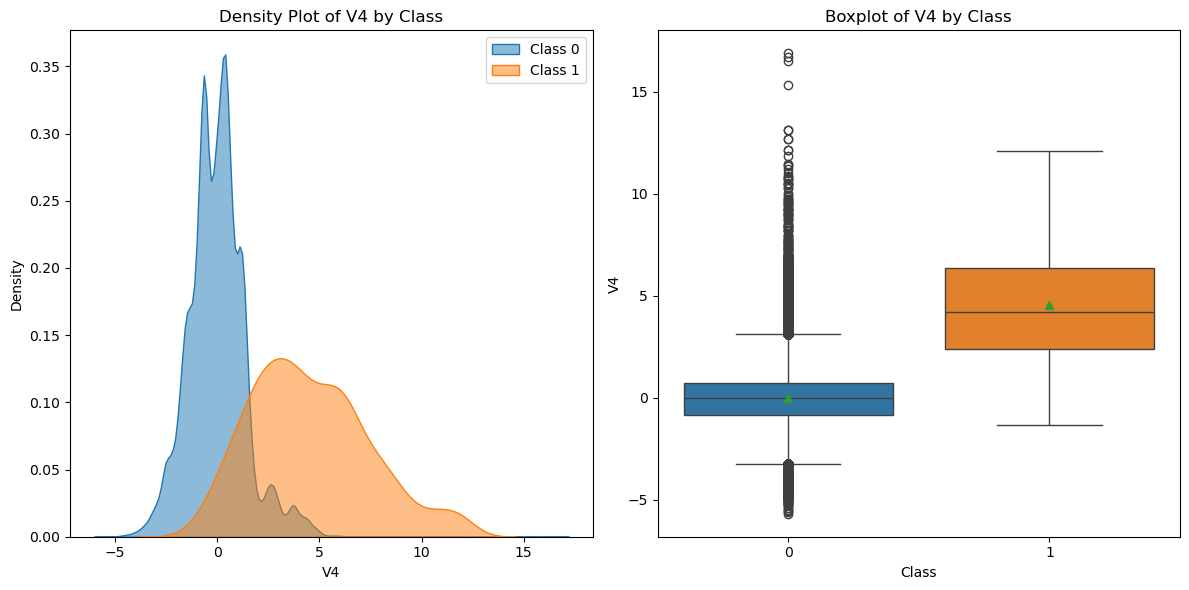

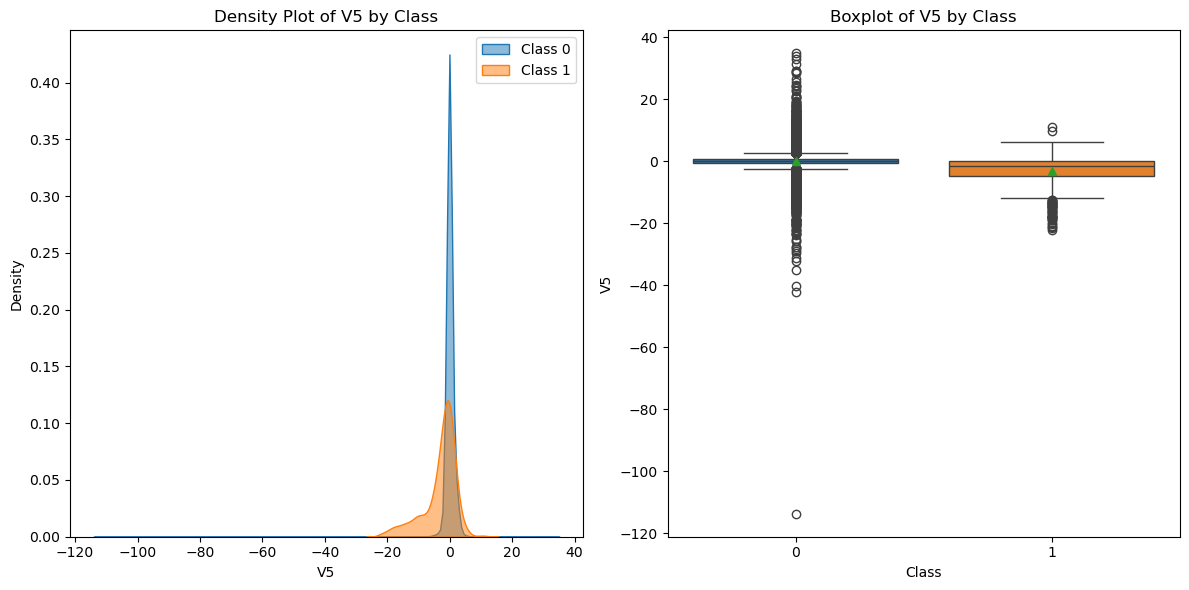

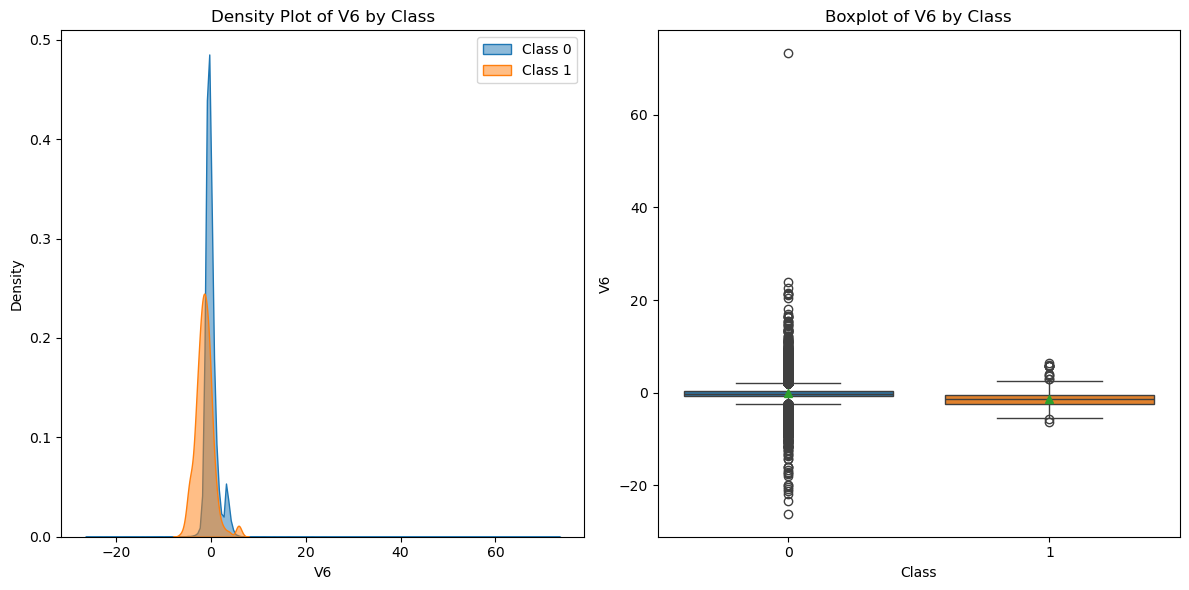

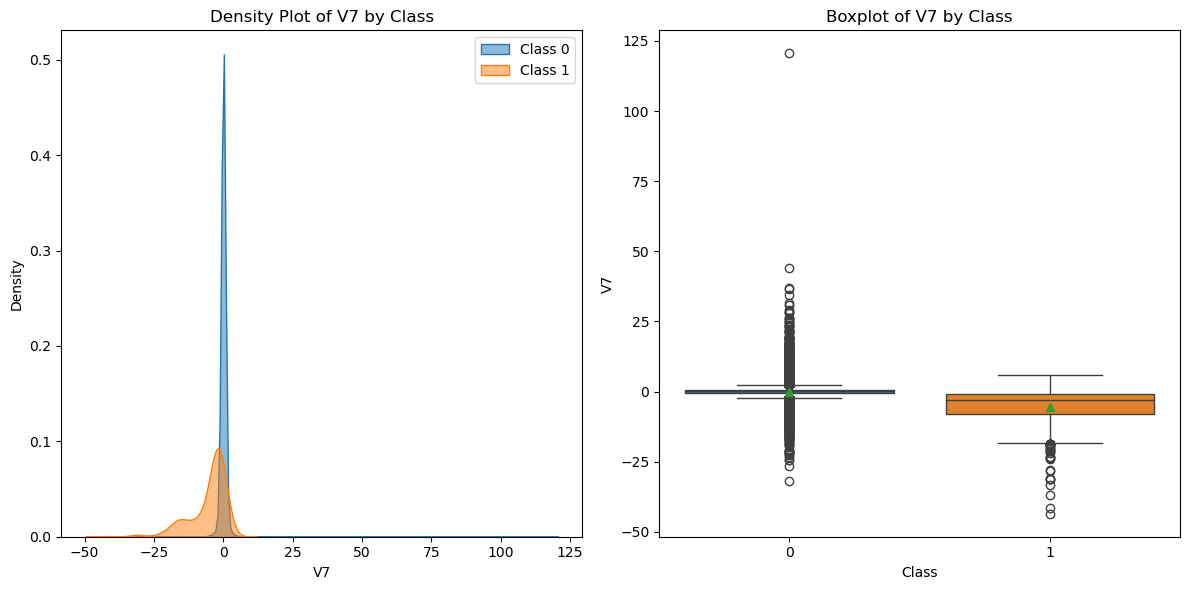

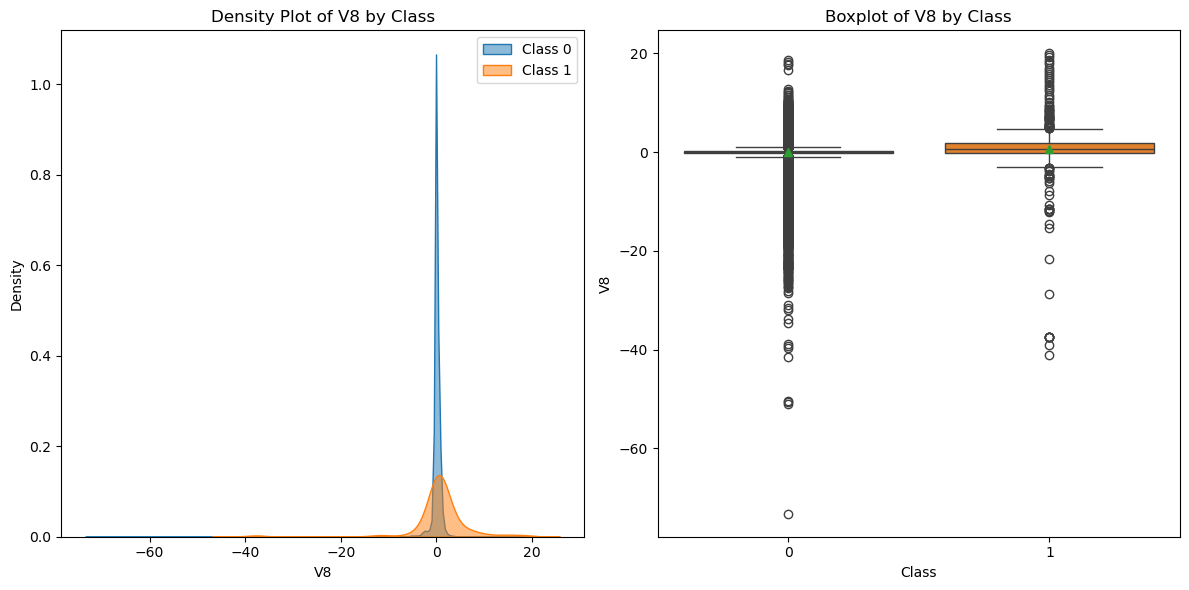

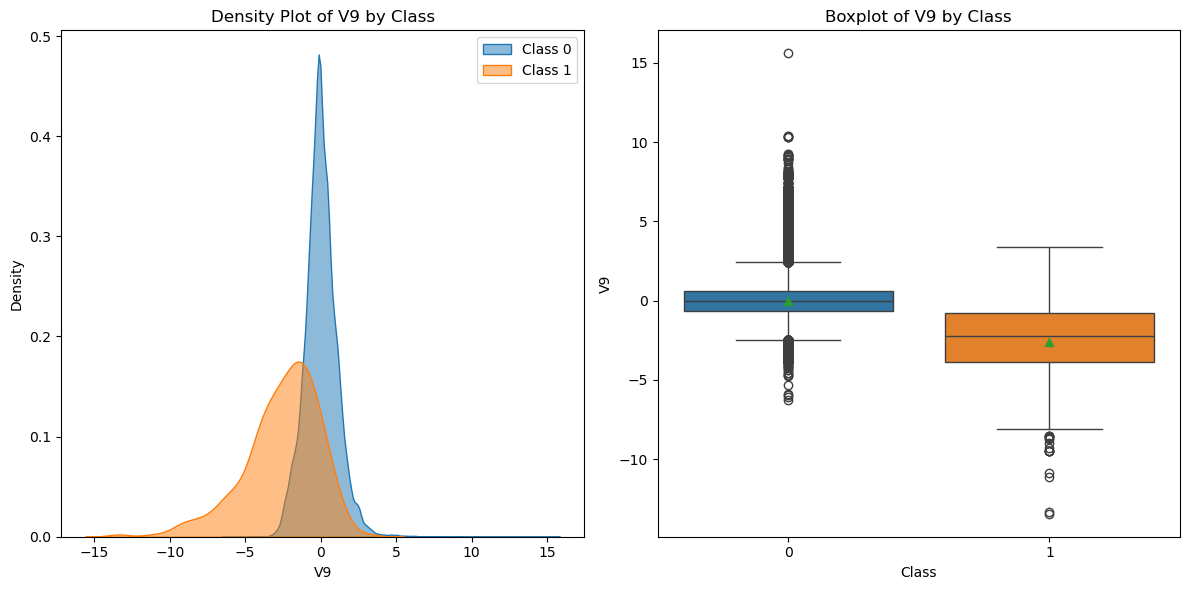

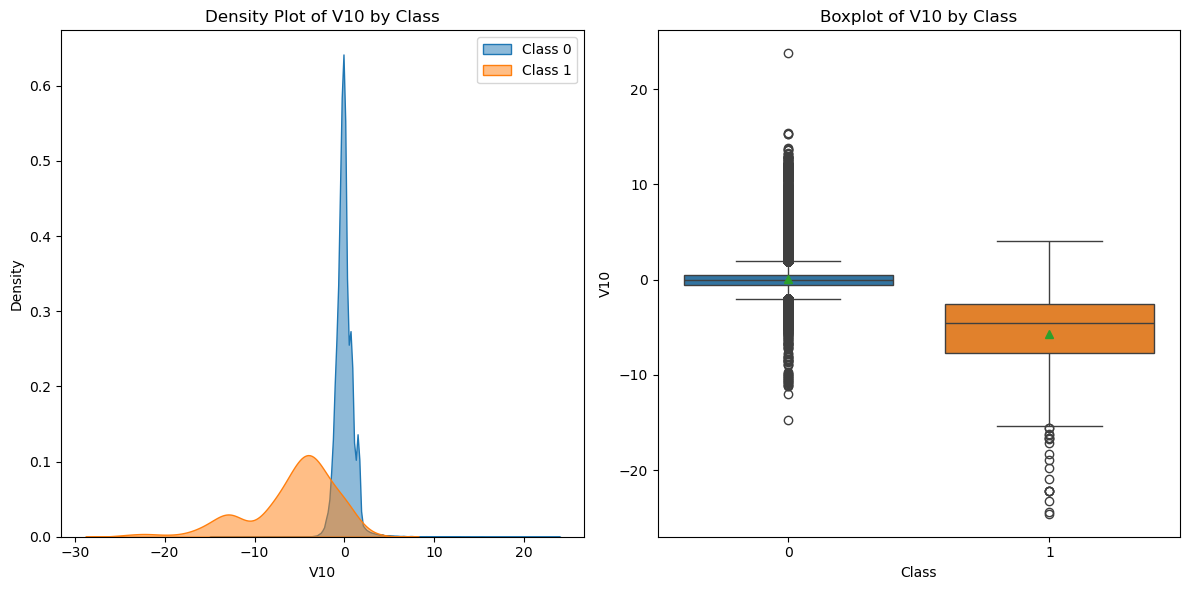

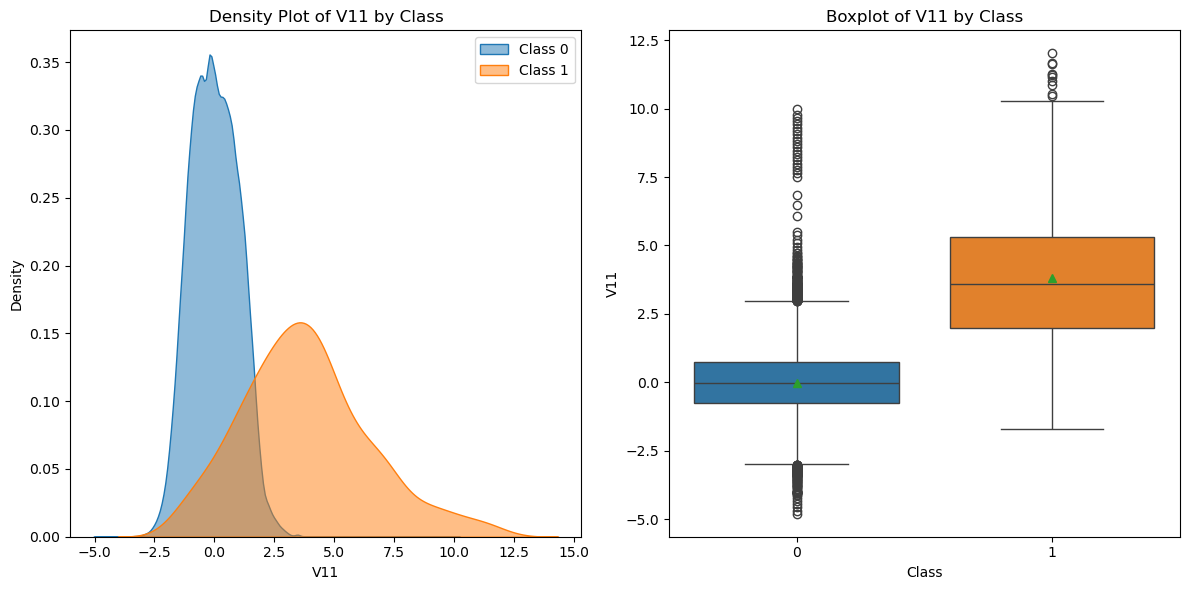

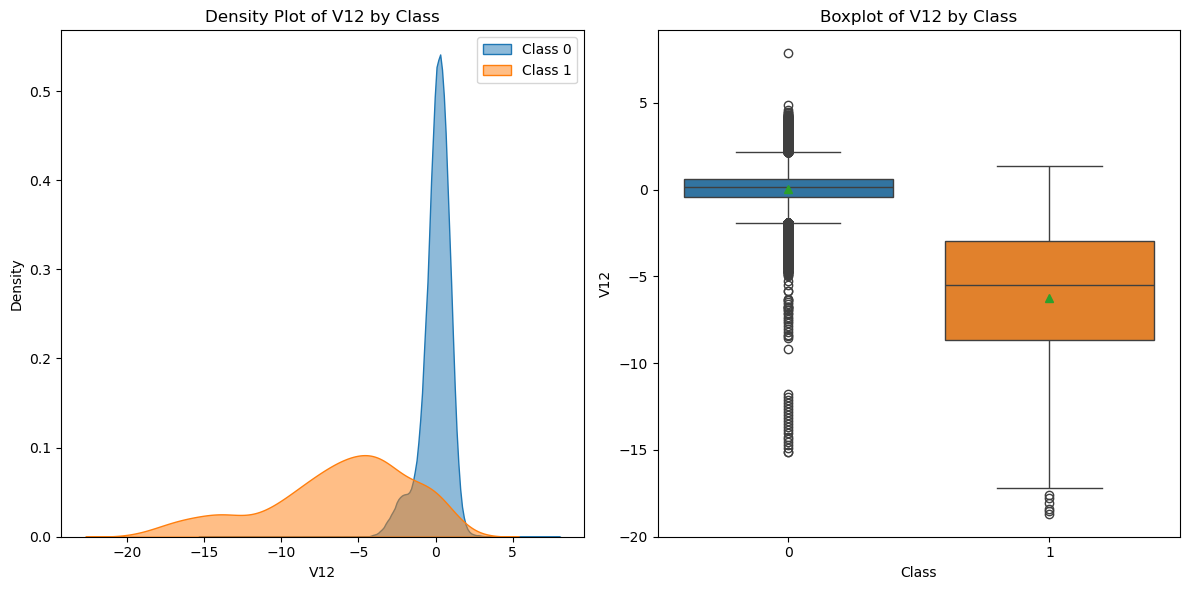

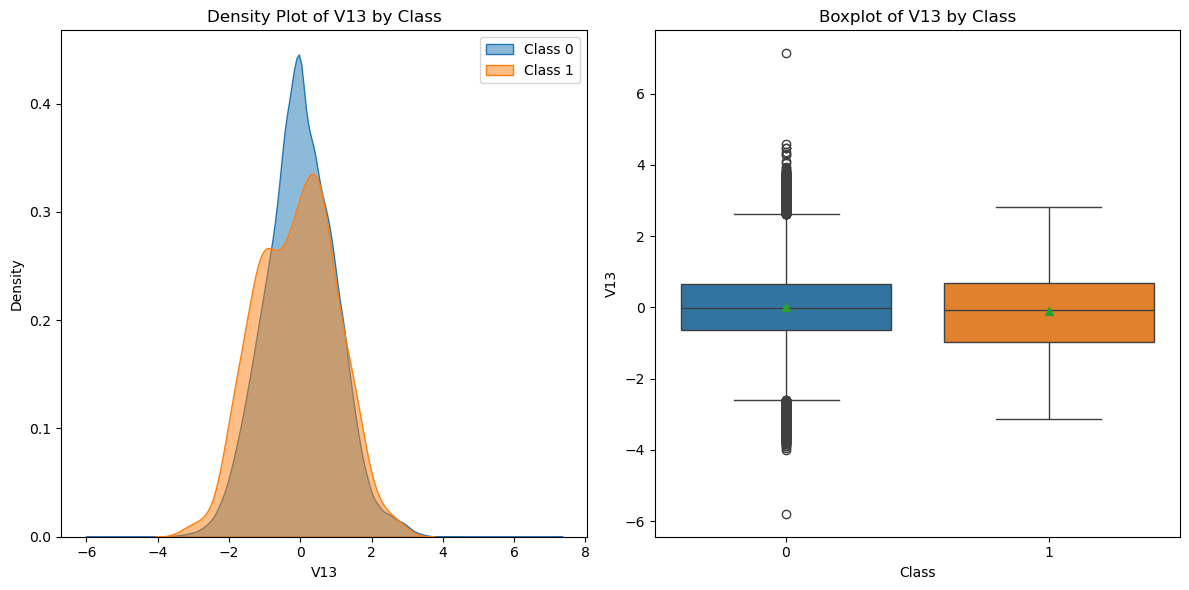

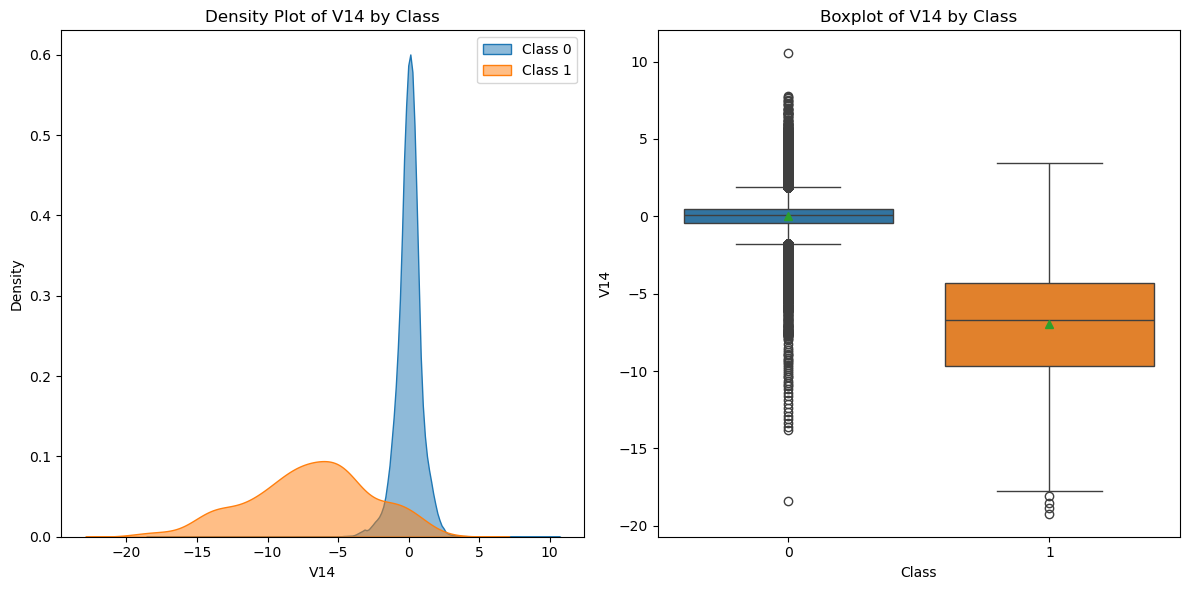

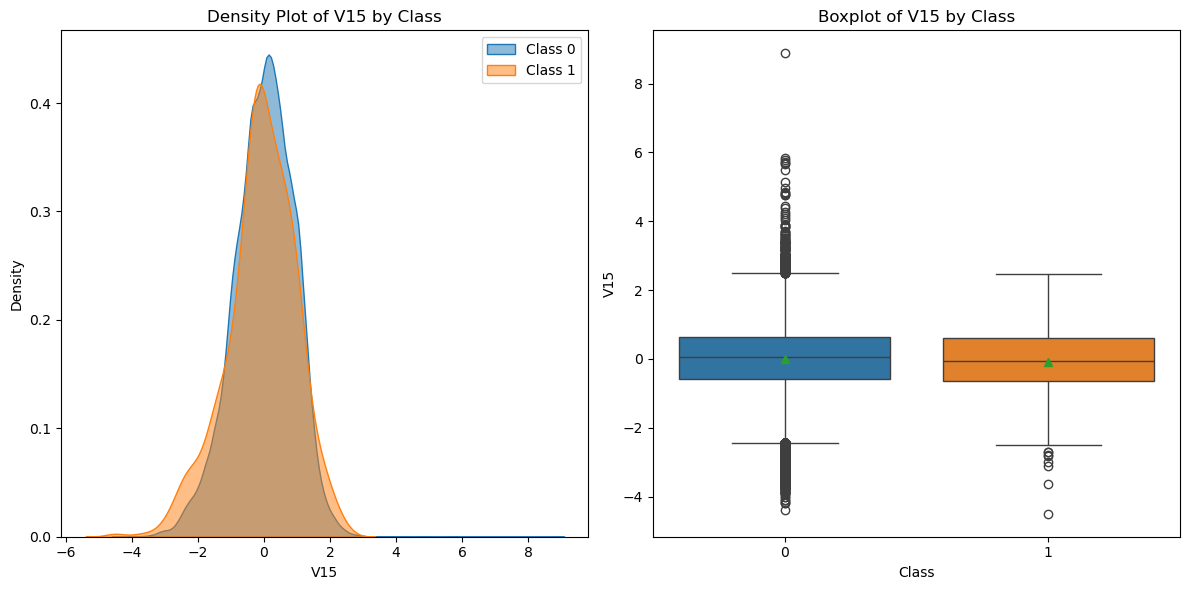

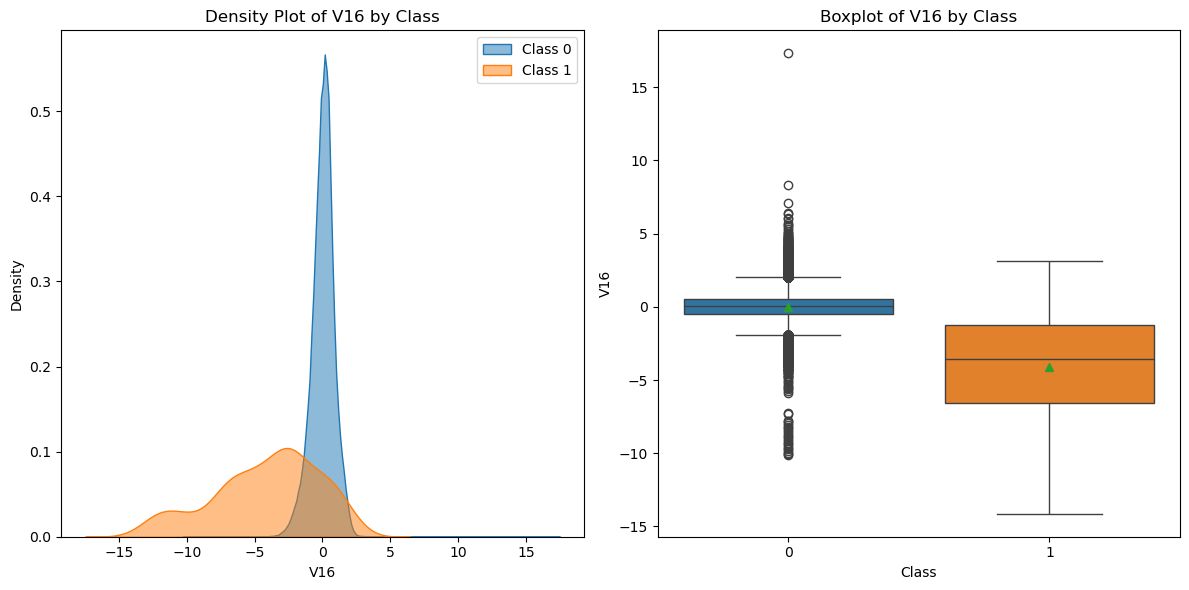

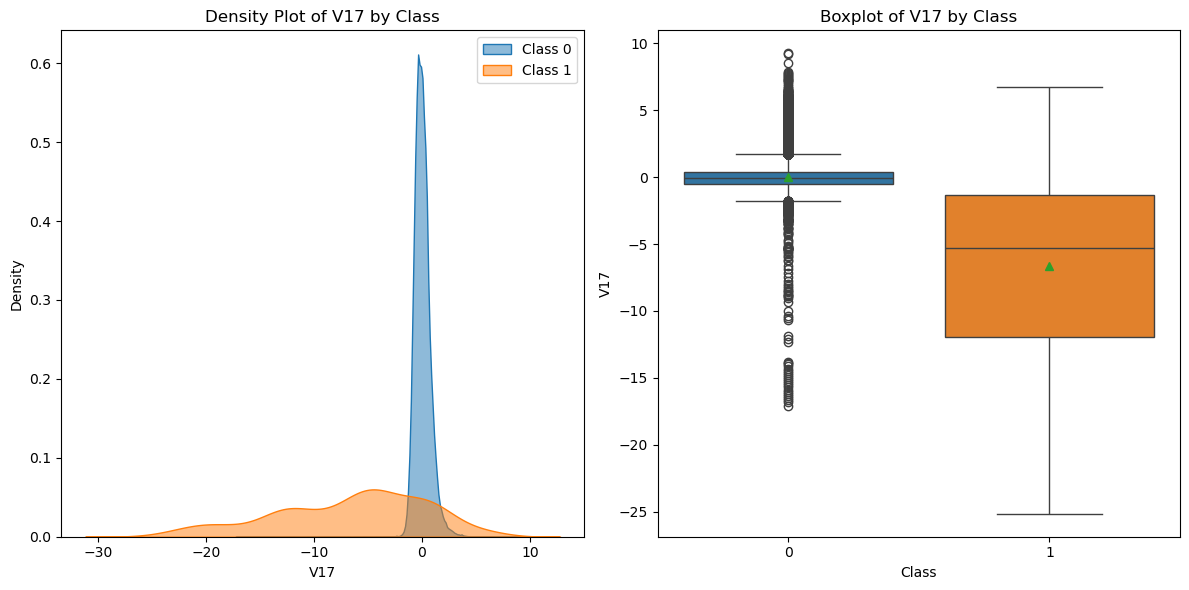

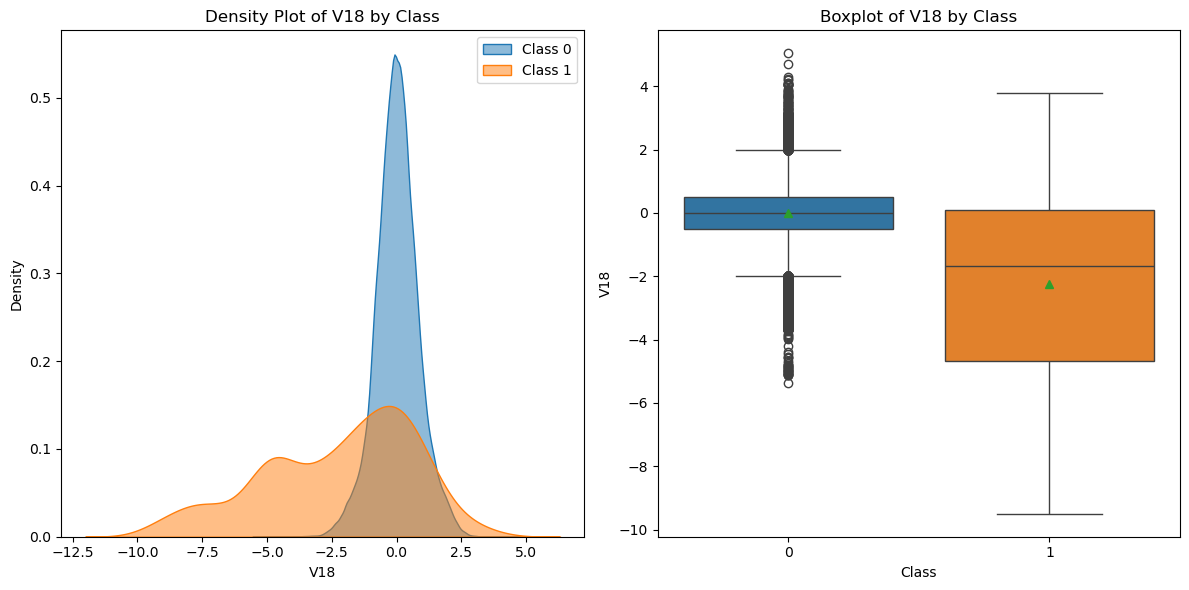

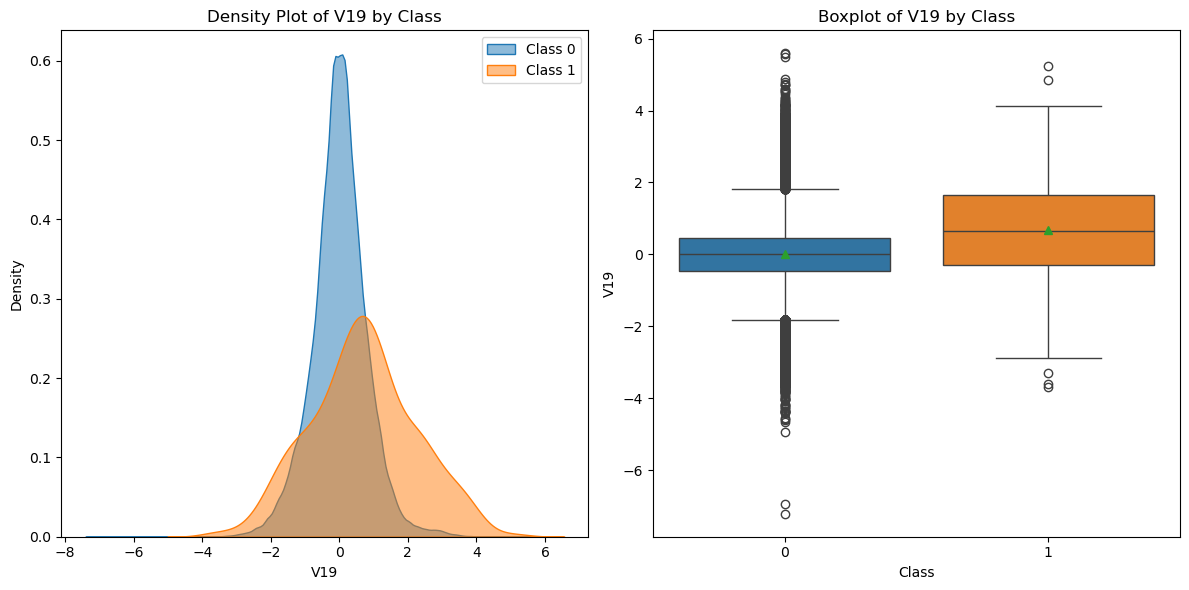

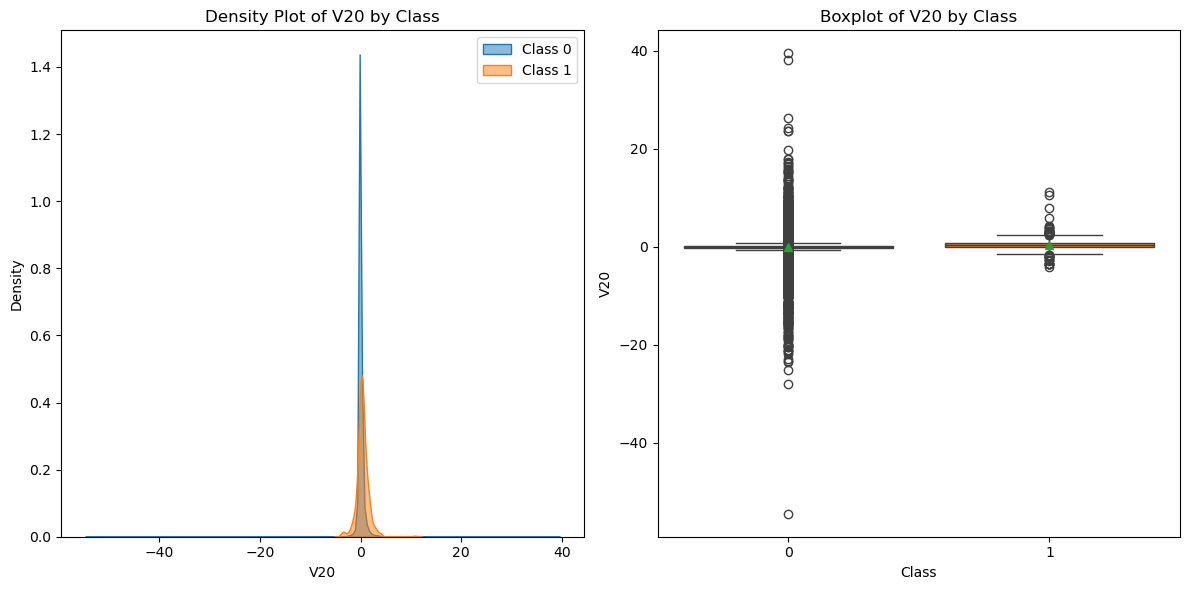

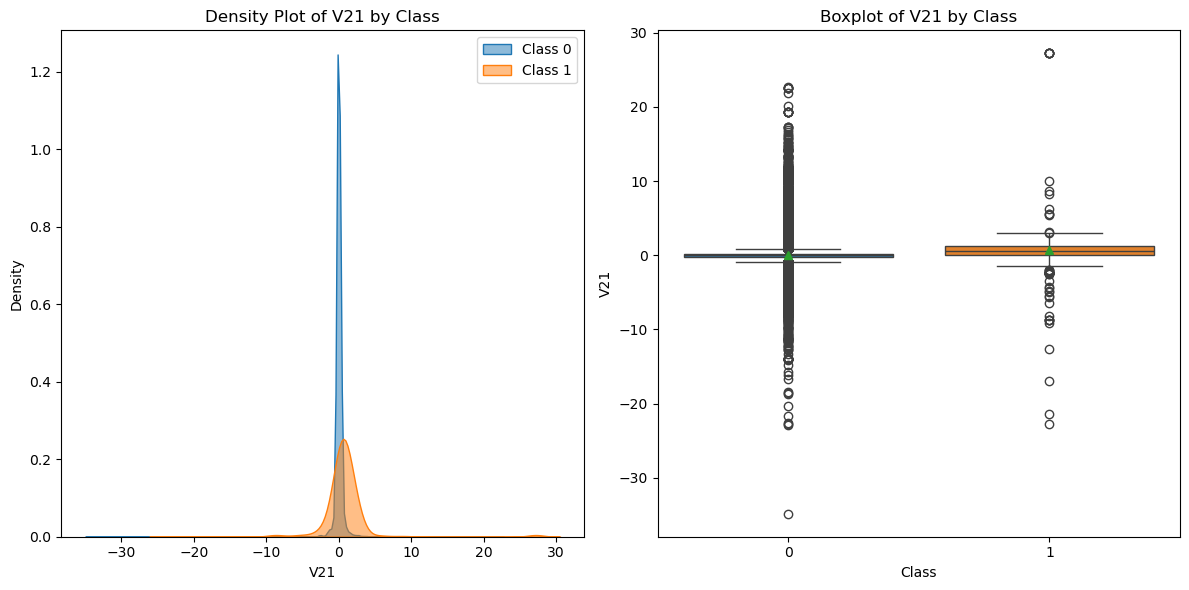

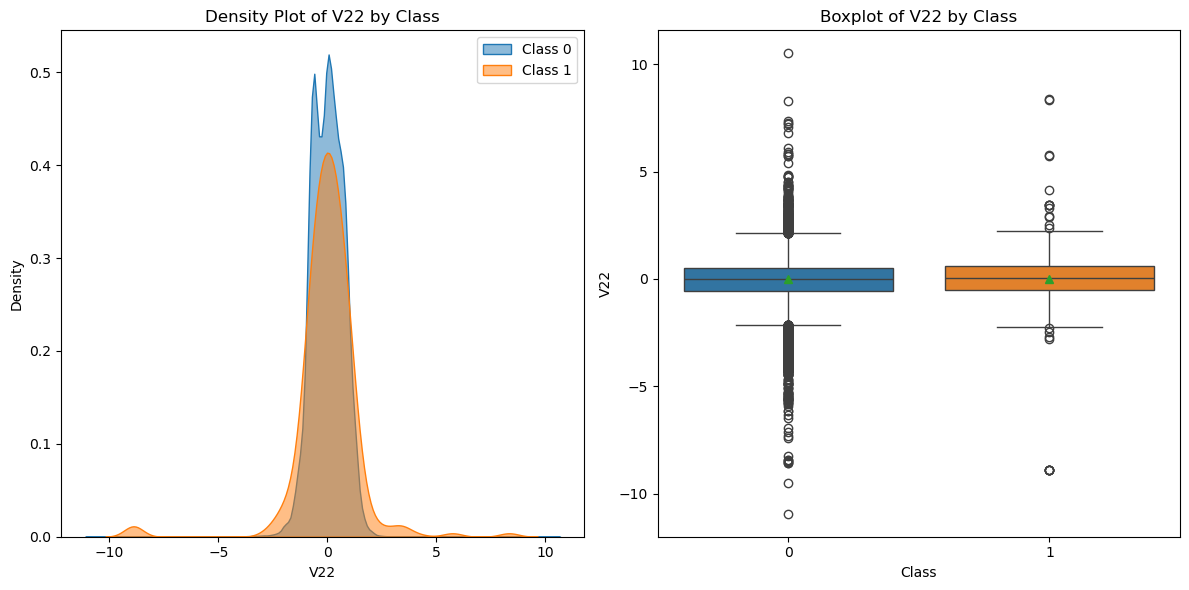

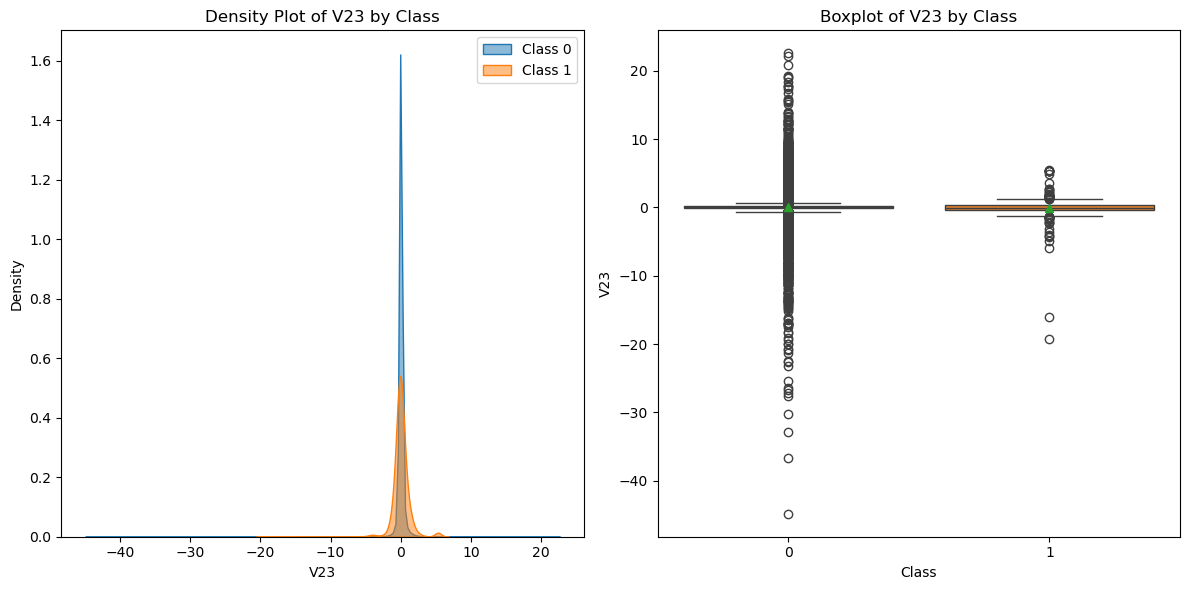

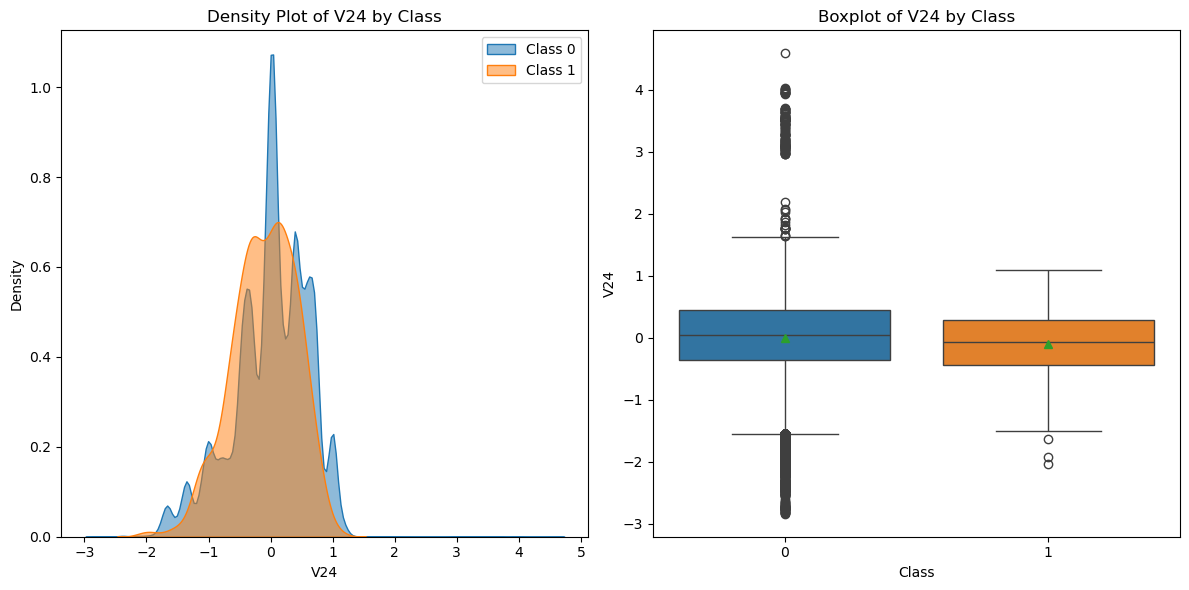

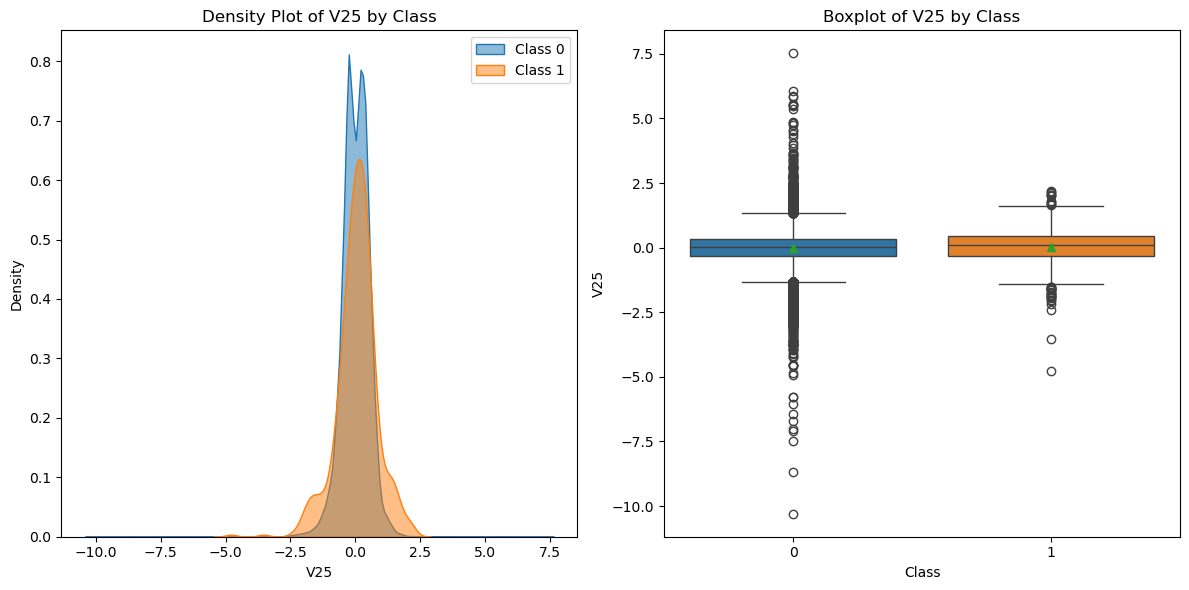

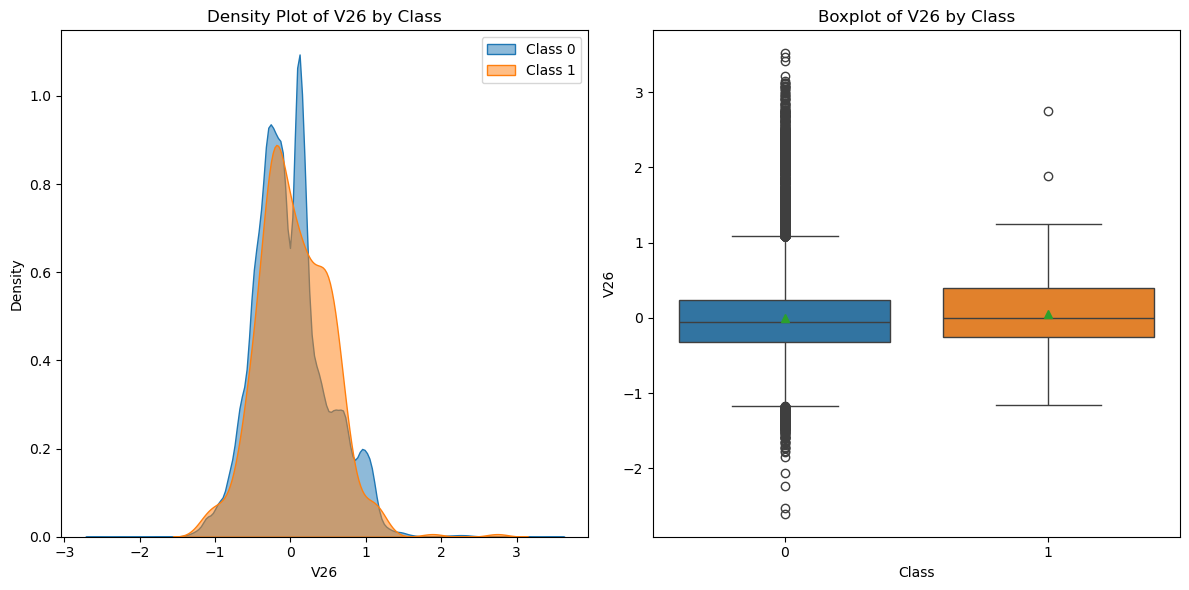

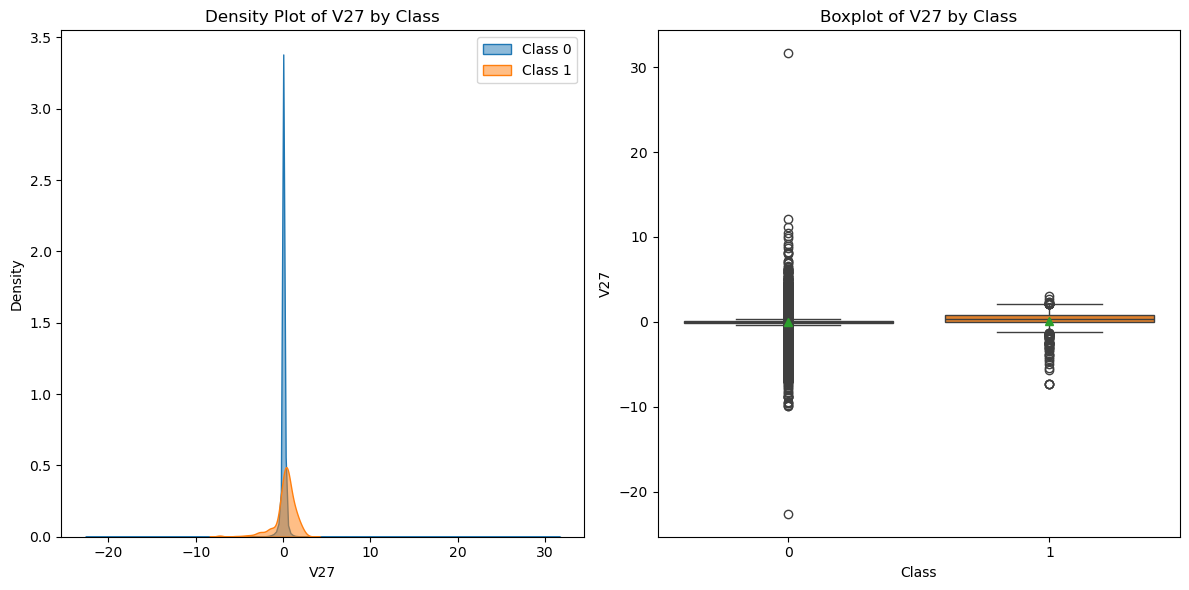

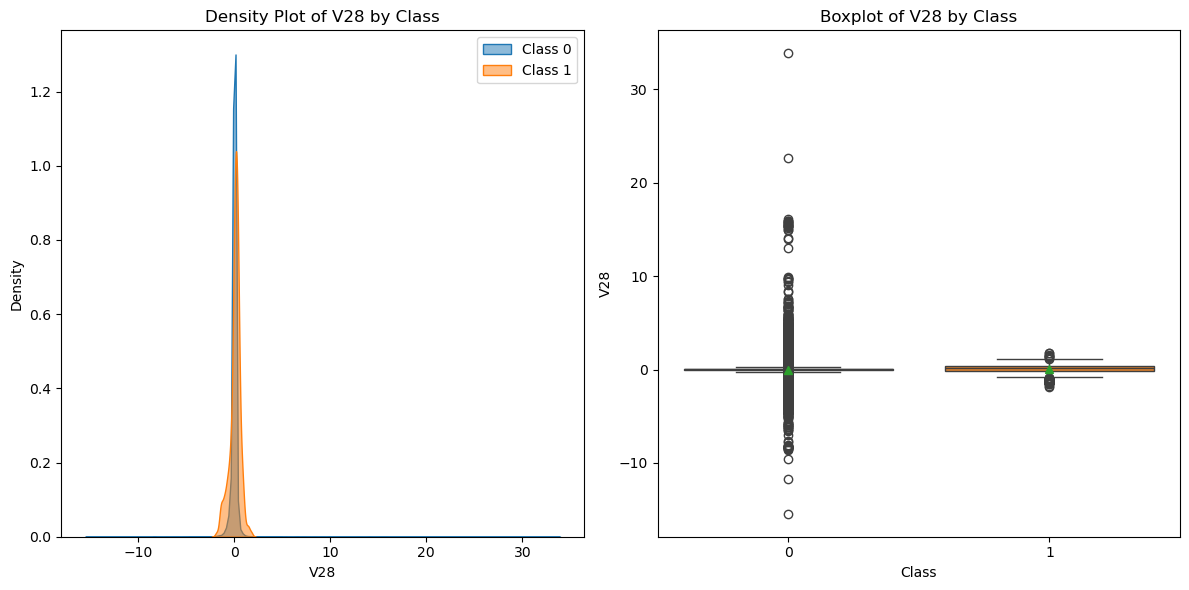

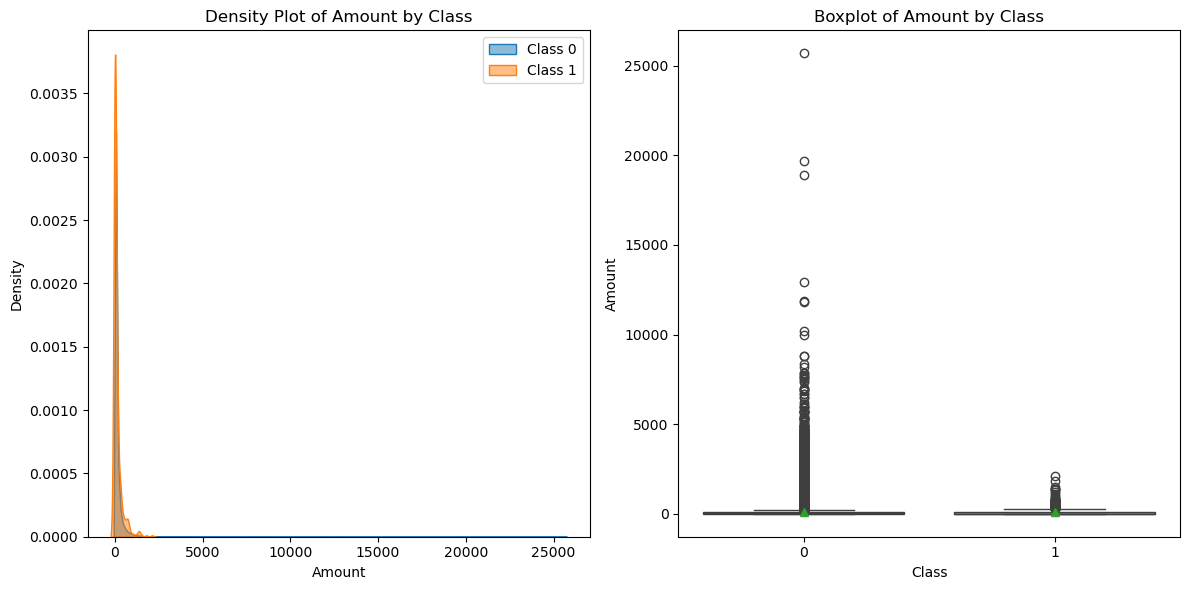

In [17]:
for feature in df.select(cs.contains(("V","Time","Amount"))).columns:
    # # Boxplots
    # plt.figure(figsize=(8, 4))
    # sns.boxplot(x="Class", y=feature, data=df)
    # plt.title(f"Boxplot of {feature} by Class")
    # plt.show()
    # Overlayed density plots for the same feature
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    sns.kdeplot(ax = ax1, data=df_non_fraud[feature], label='Class 0', fill=True, alpha=0.5)
    sns.kdeplot(ax = ax1, data=df_fraud[feature], label='Class 1', fill=True, alpha=0.5)
    ax1.set_title(f"Density Plot of {feature} by Class")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Density")
    ax1.legend()
    # Boxplots
    s = sns.boxplot(ax = ax2, x="Class", y= feature, data=df, showmeans=True, hue= "Class", legend= False)
    ax2.set_title(f"Boxplot of {feature} by Class")
    plt.tight_layout()
    plt.show()

we can observe a good selectivity in terms of distribution for the two values of Class: 
- V4, V11 have clearly separated distributions for Class values 0 and 1
- V12, V14, V18 are partially separated
- V1, V2, V3, V10 have a quite distinct profile
- V25, V26, V28 have similar profiles for the two values of Class

## Downsample Majority Class for Plots

**Note**: If the minority class (class 1) trend was not visible in the above visualizations, we could create a balanced sample data set by combining the minority class and a random sample of the majority class for clearer side-by-side comparisons. Keep this in mind that this is only for visualization purposes!

In [18]:
# Downsampling majority class for balanced visualization
sample_size = len(df_fraud)
non_fraud_sampled = df_non_fraud.sample(n=sample_size, seed=42, shuffle=True)
balanced_sample_df = pl.concat([non_fraud_sampled, df_fraud])

In [19]:
pl_valueCounts_perc("Class",balanced_sample_df)

shape: (2, 3)
┌───────┬───────┬──────────────┐
│ Class ┆ count ┆ percentage % │
│ ---   ┆ ---   ┆ ---          │
│ i64   ┆ u32   ┆ f64          │
╞═══════╪═══════╪══════════════╡
│ 0     ┆ 492   ┆ 50.0         │
│ 1     ┆ 492   ┆ 50.0         │
└───────┴───────┴──────────────┘

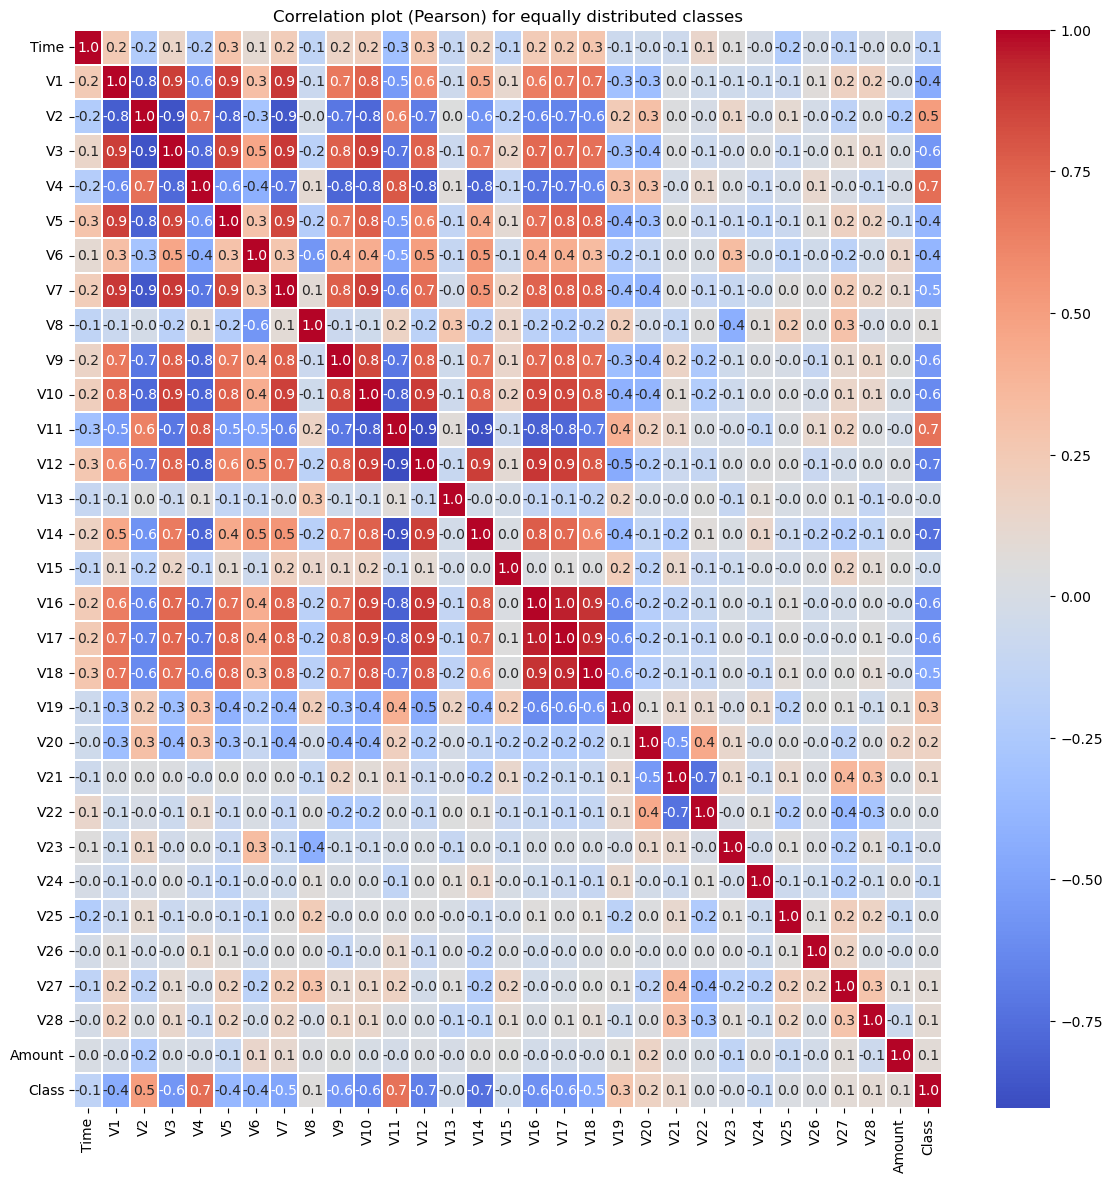

In [20]:
plt.figure(figsize = (14,14))
plt.title('Correlation plot (Pearson) for equally distributed classes')
corr = balanced_sample_df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    linewidths=.12,
    cmap="coolwarm",
    annot=True,
    fmt=".1f"
)
plt.show()

Compared to the earlier correlation plot, correlation  among features seems to be more obvious. We can see the target is
- correlated with V2, V4, V11, ...
- inversely correlated with V14, V12, V10, V9, V3, ...

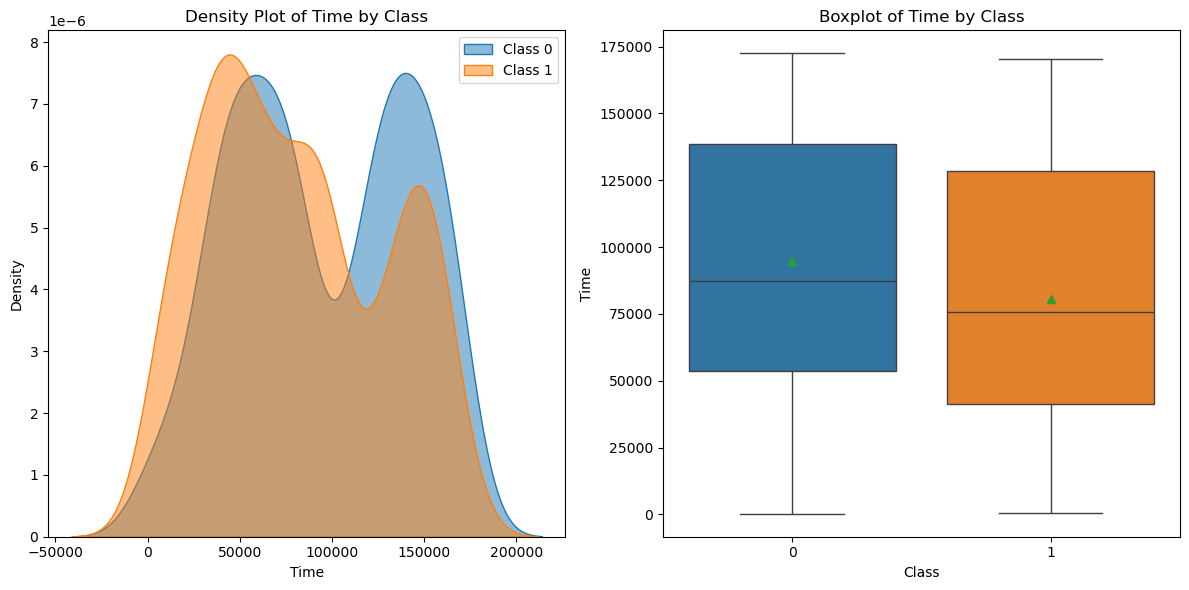

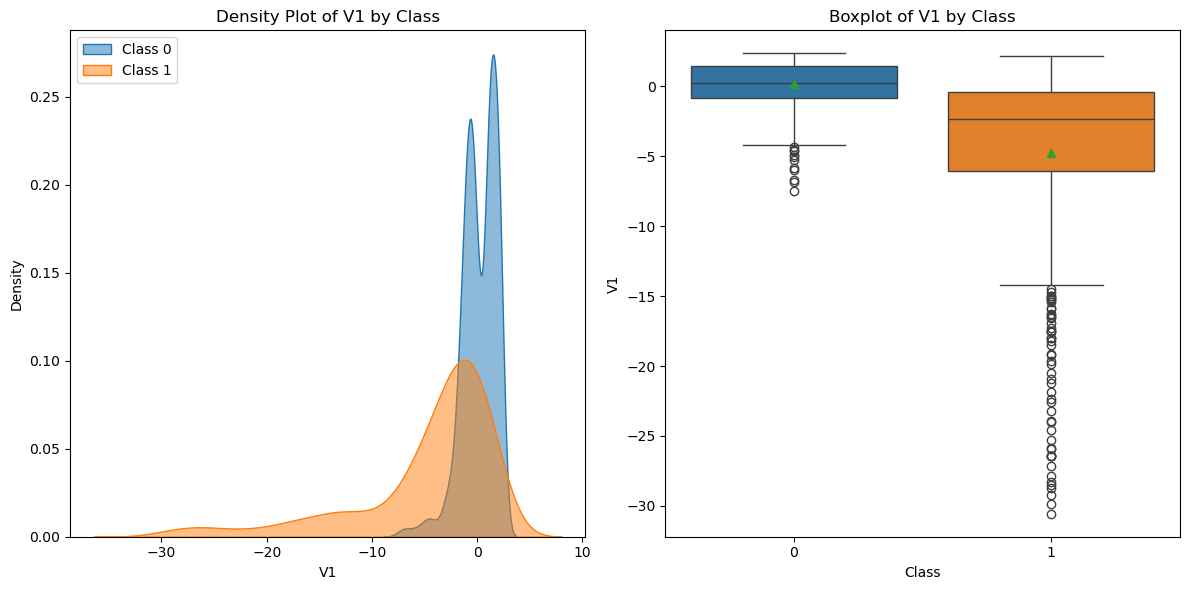

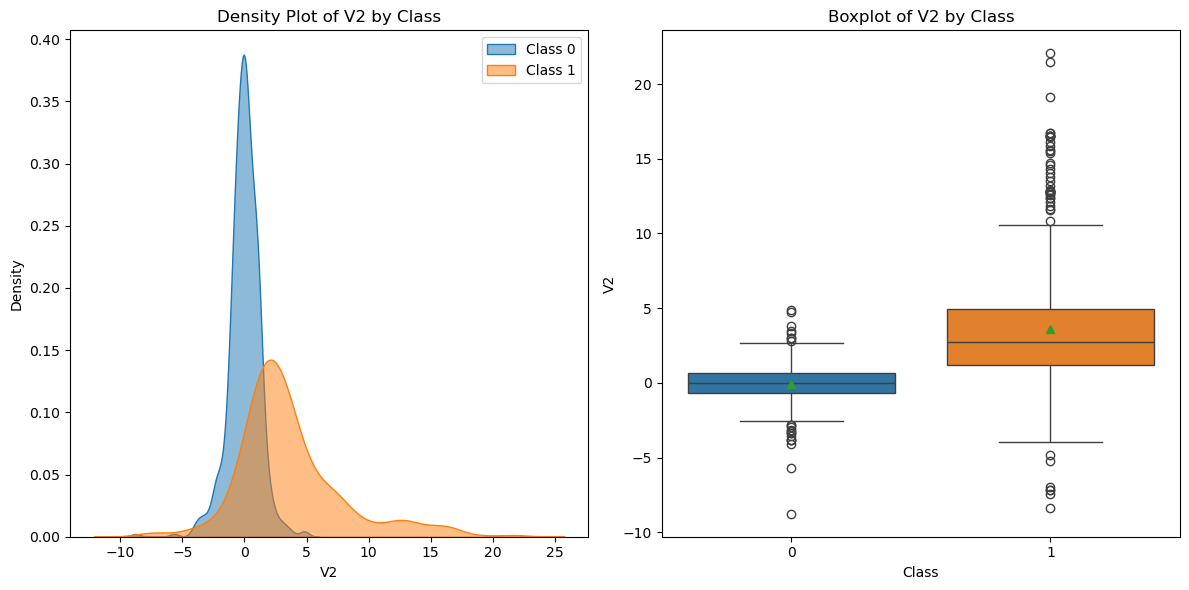

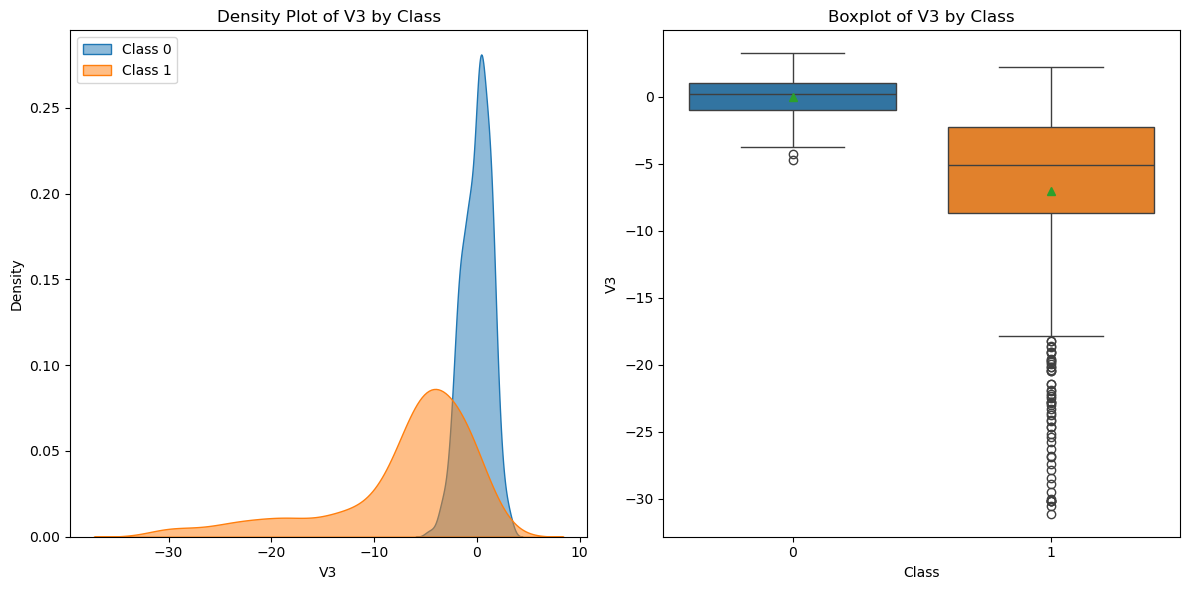

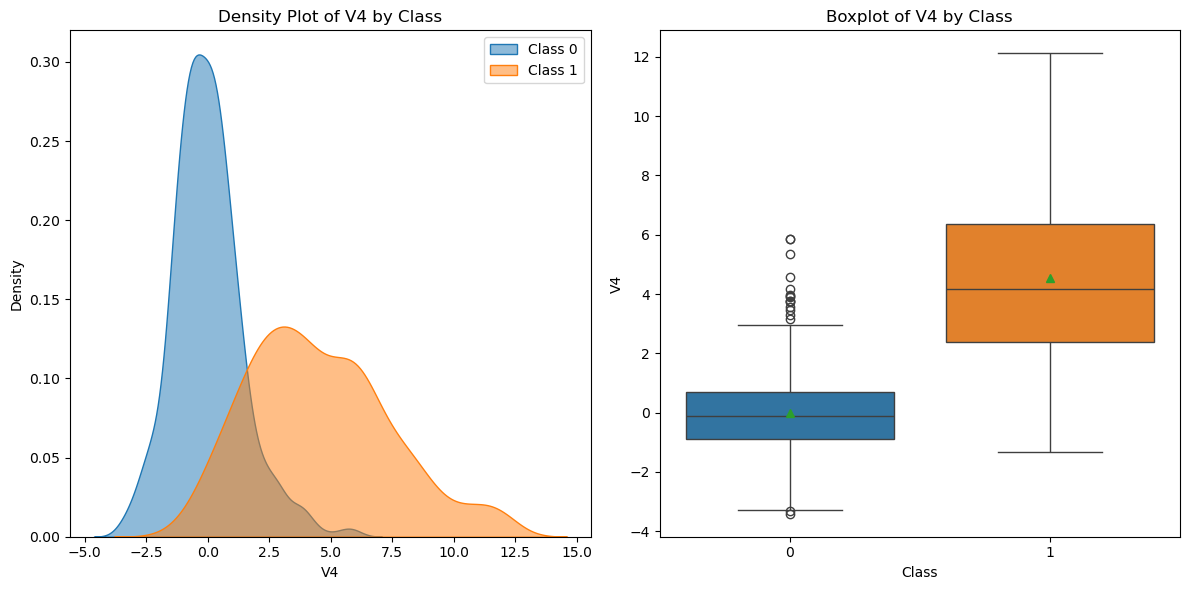

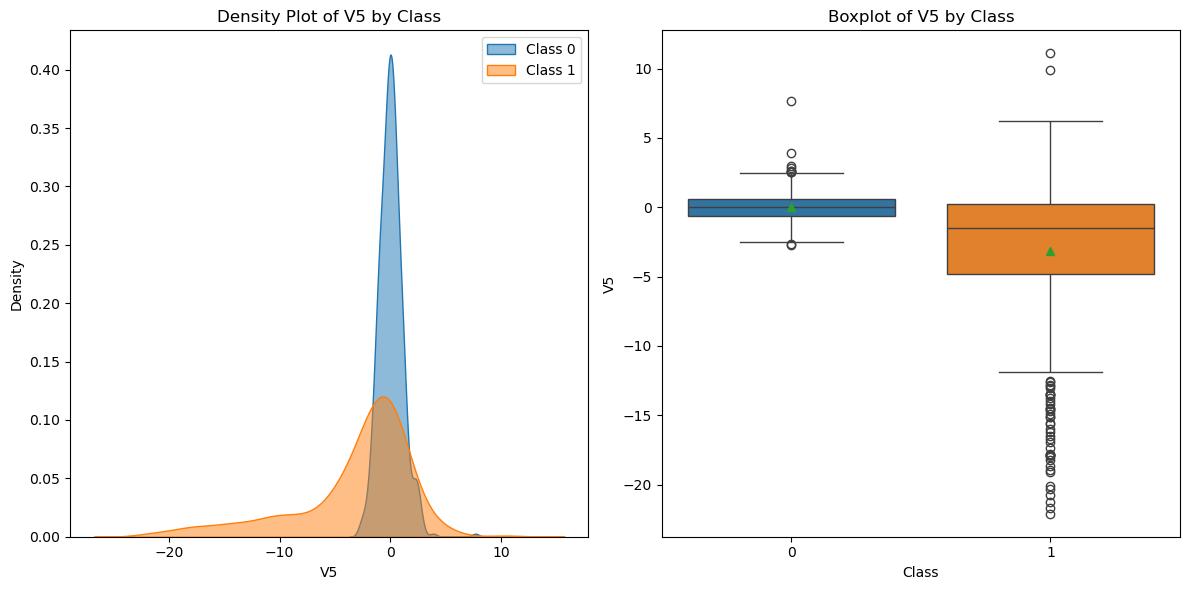

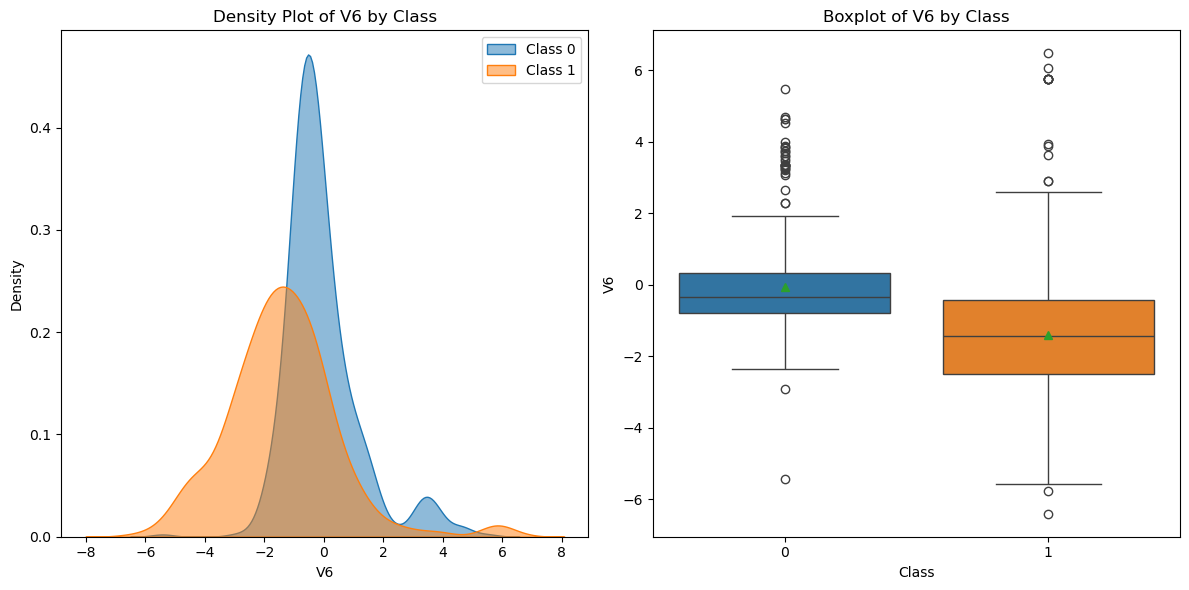

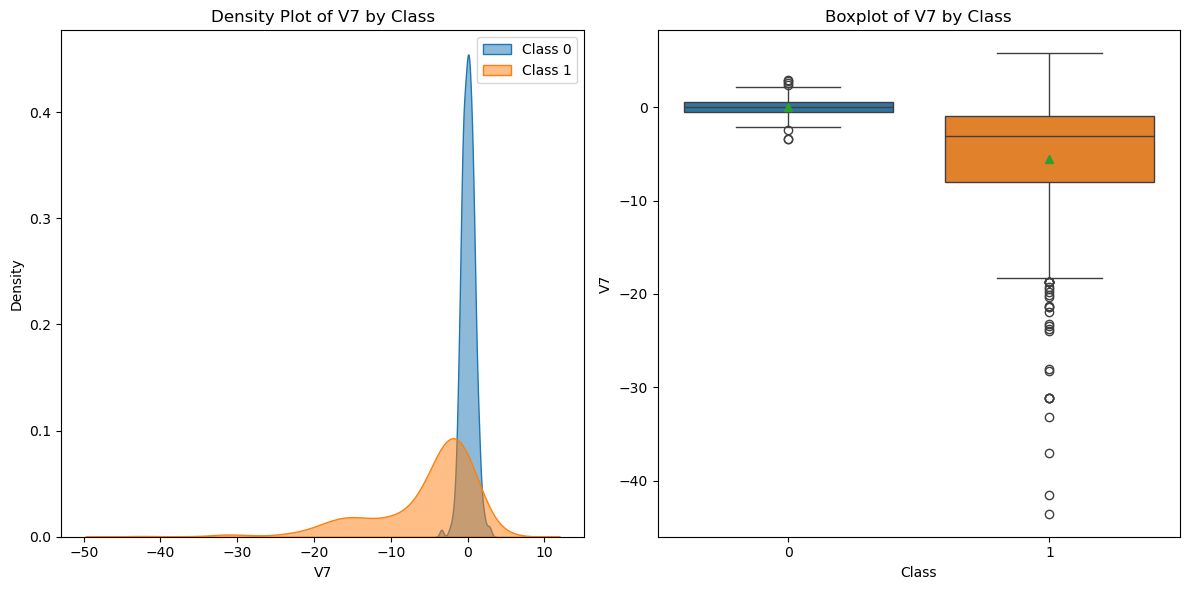

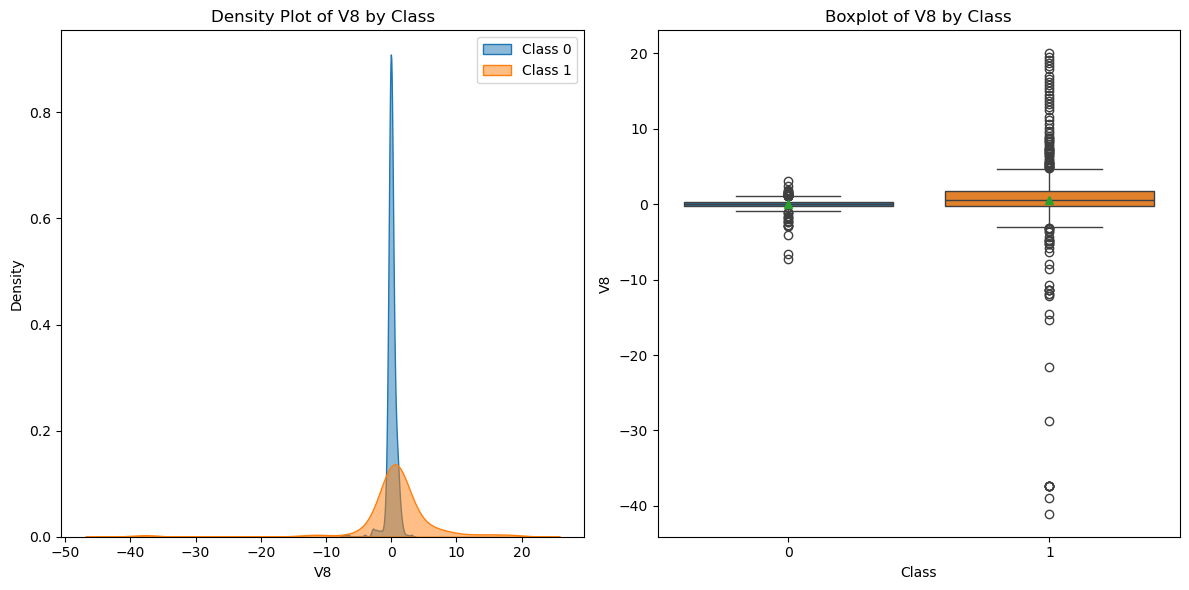

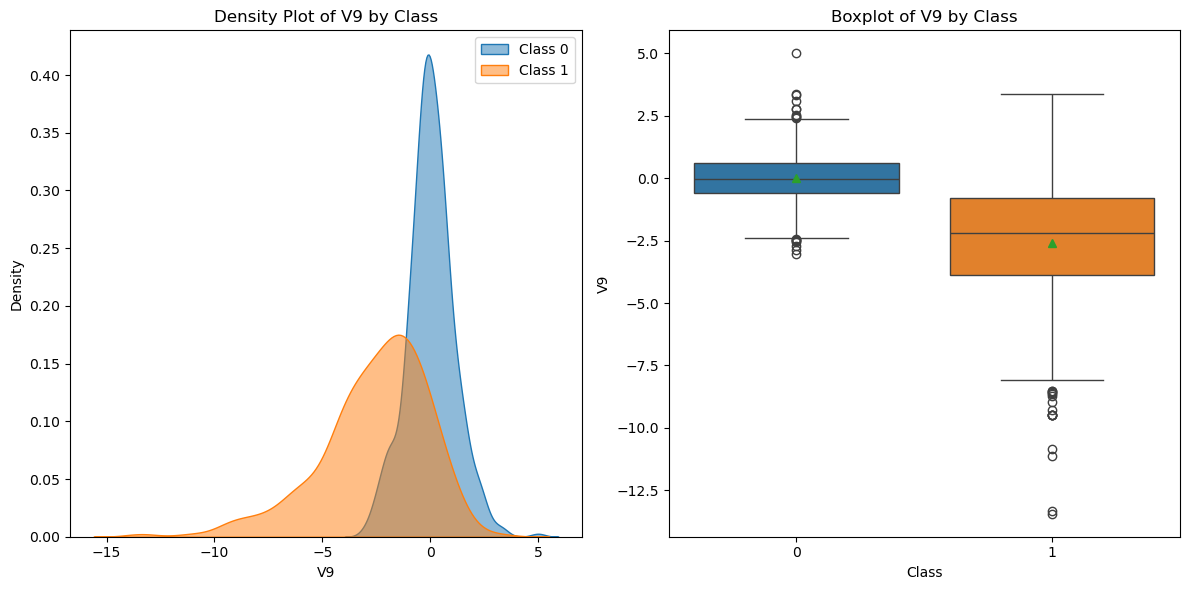

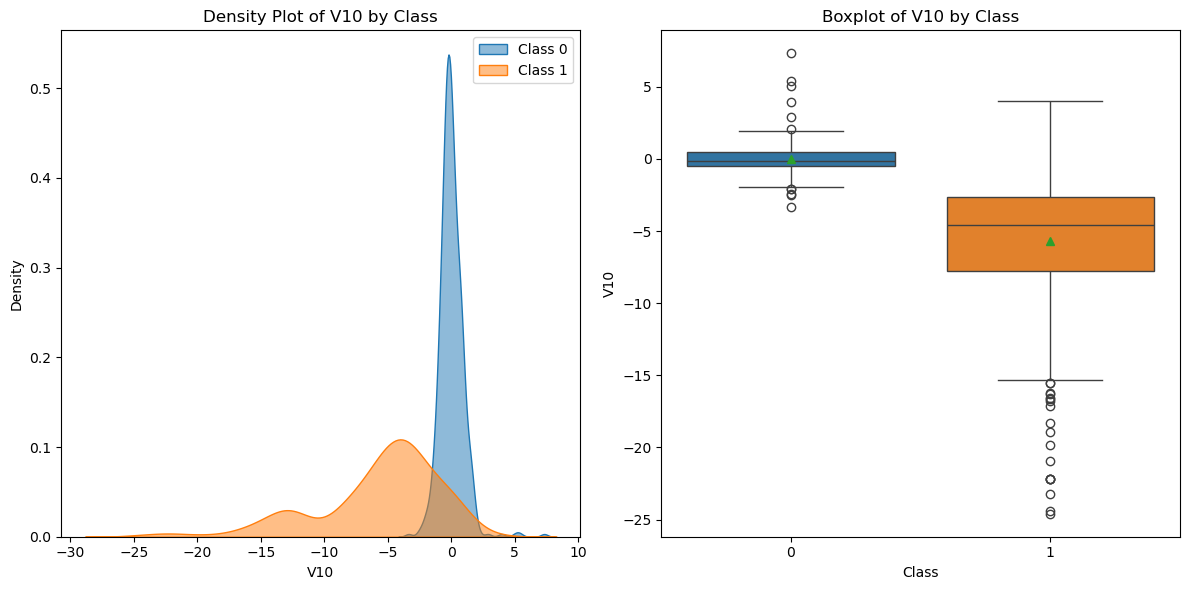

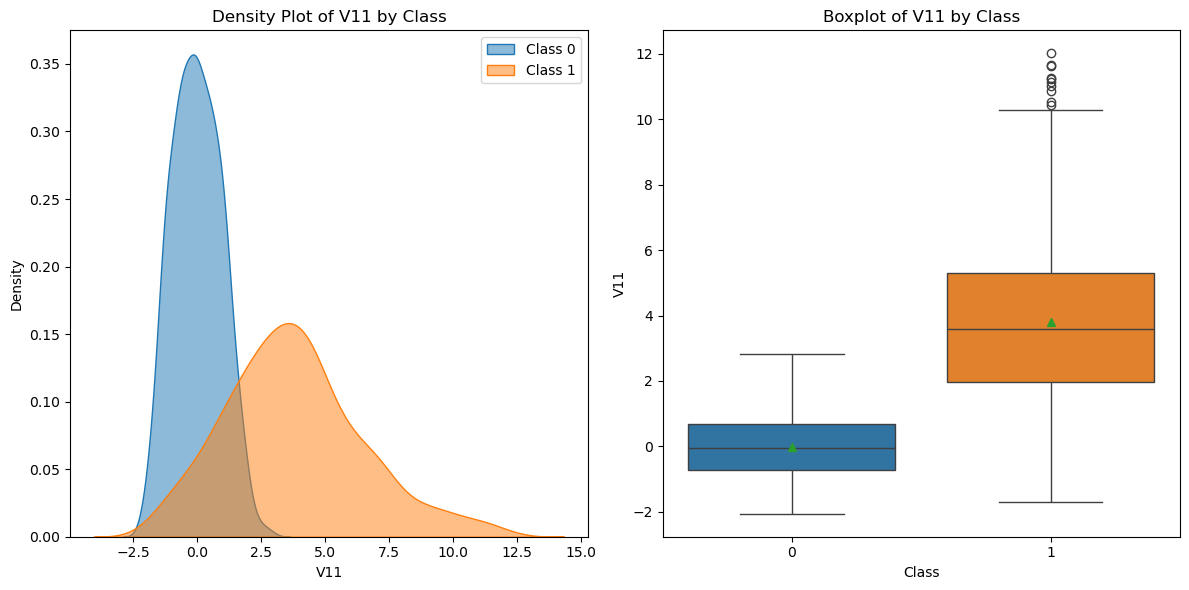

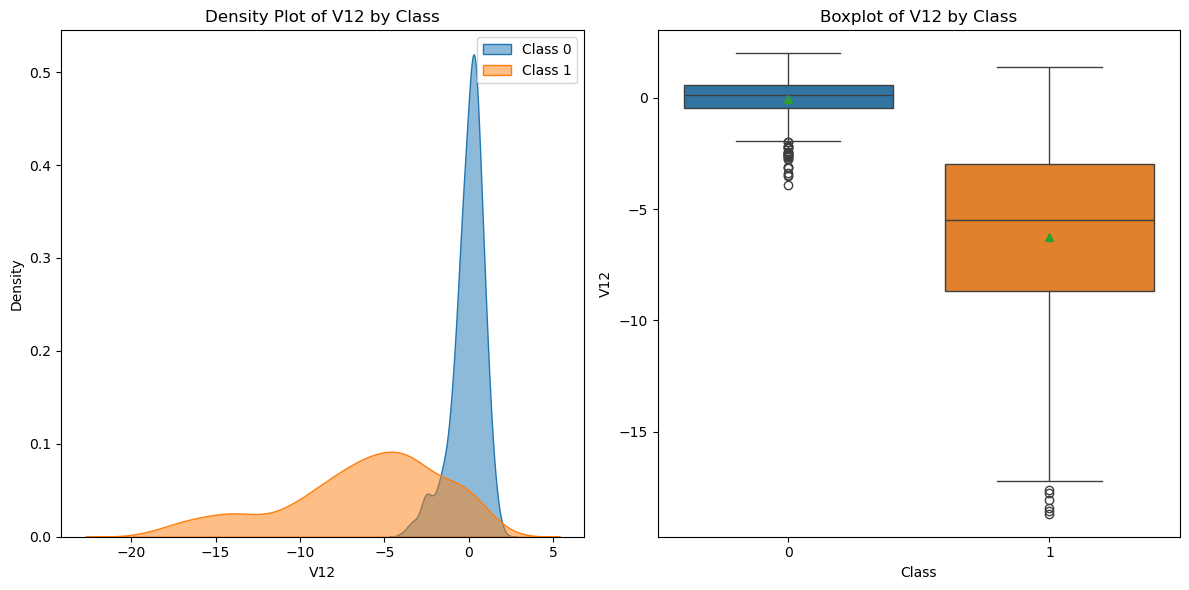

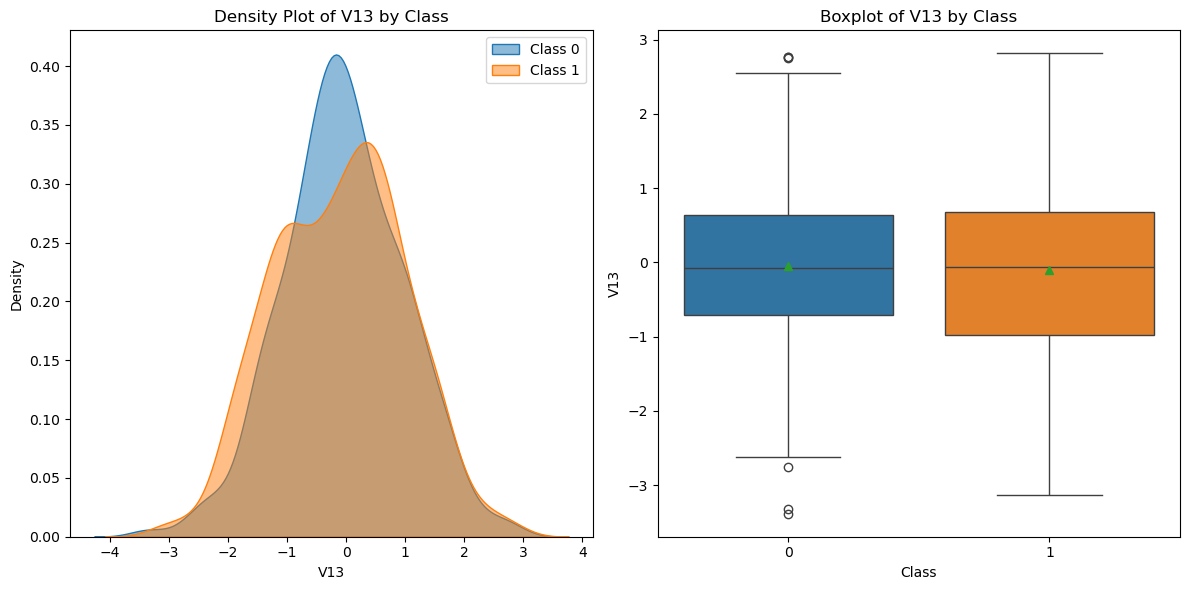

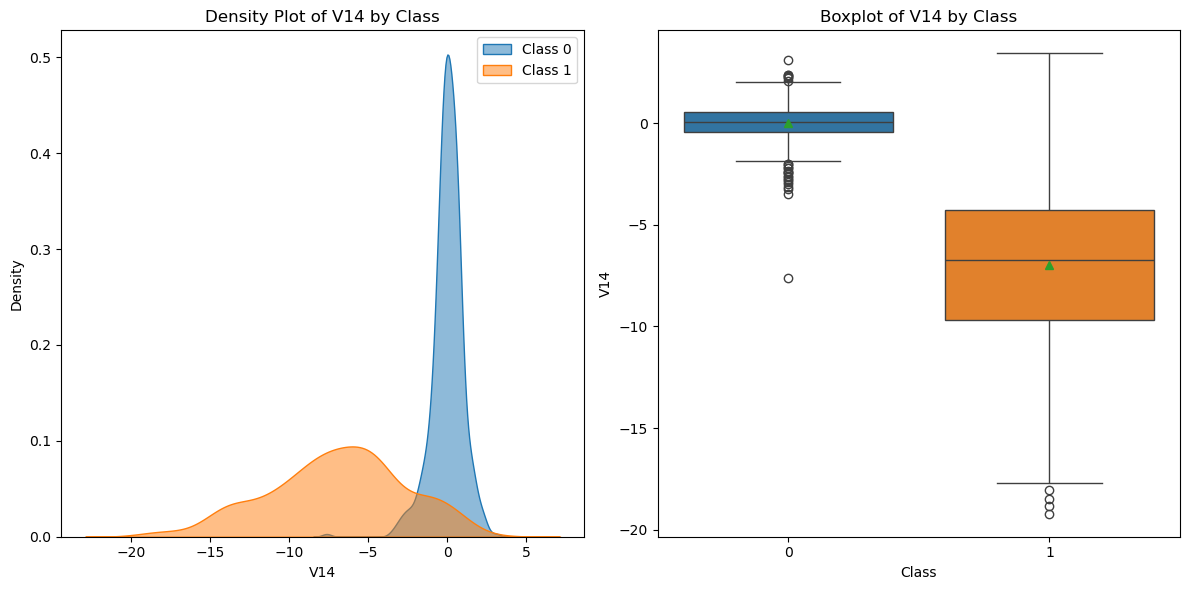

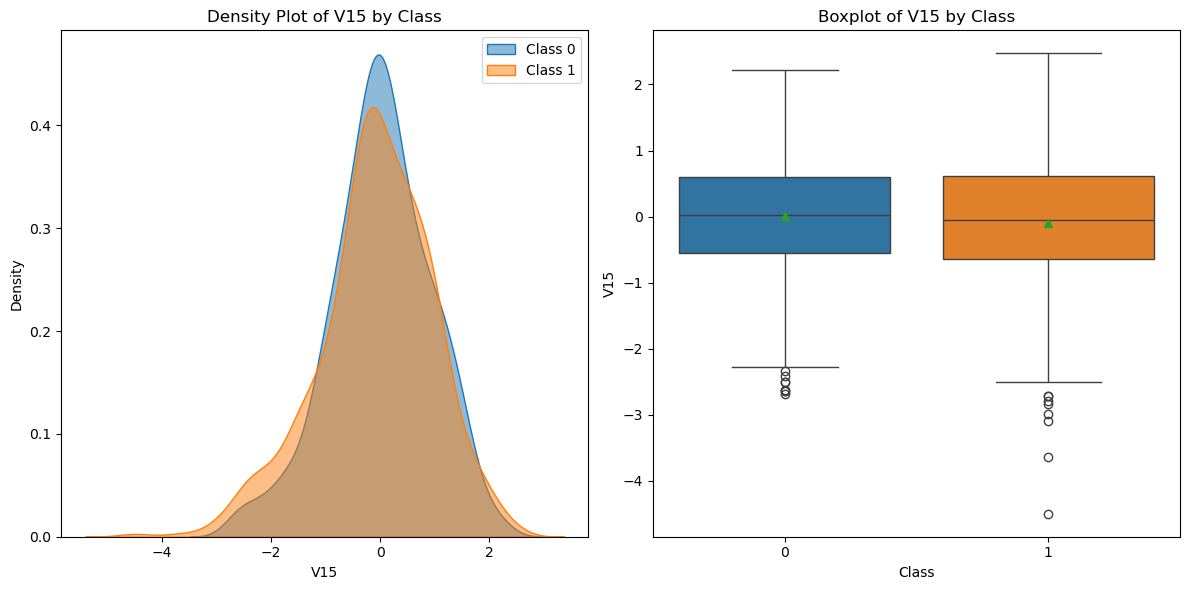

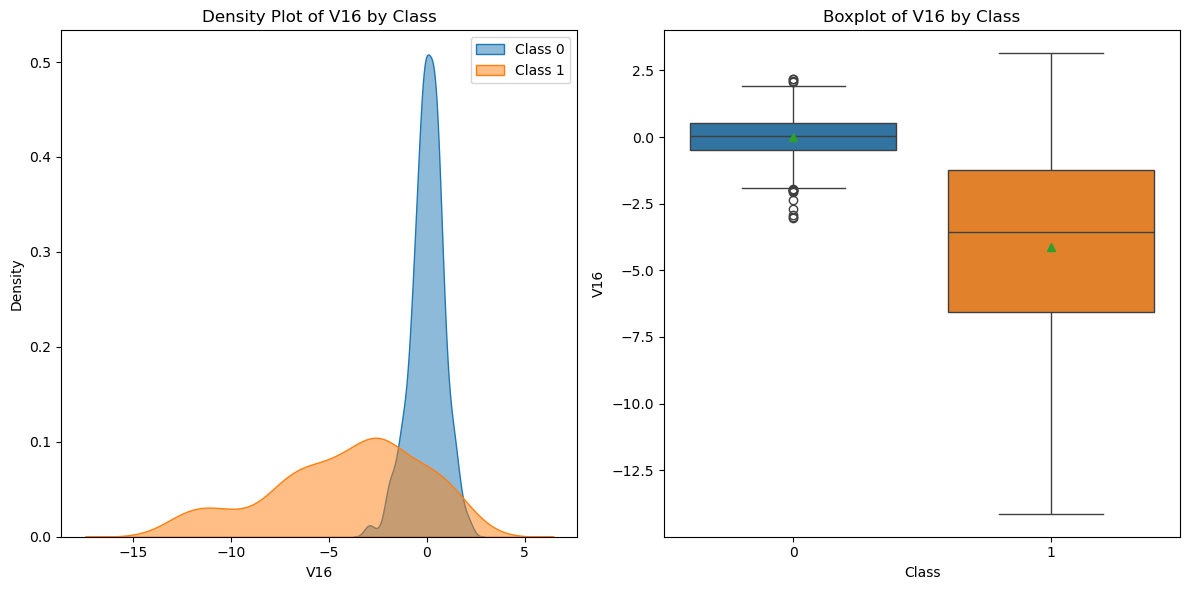

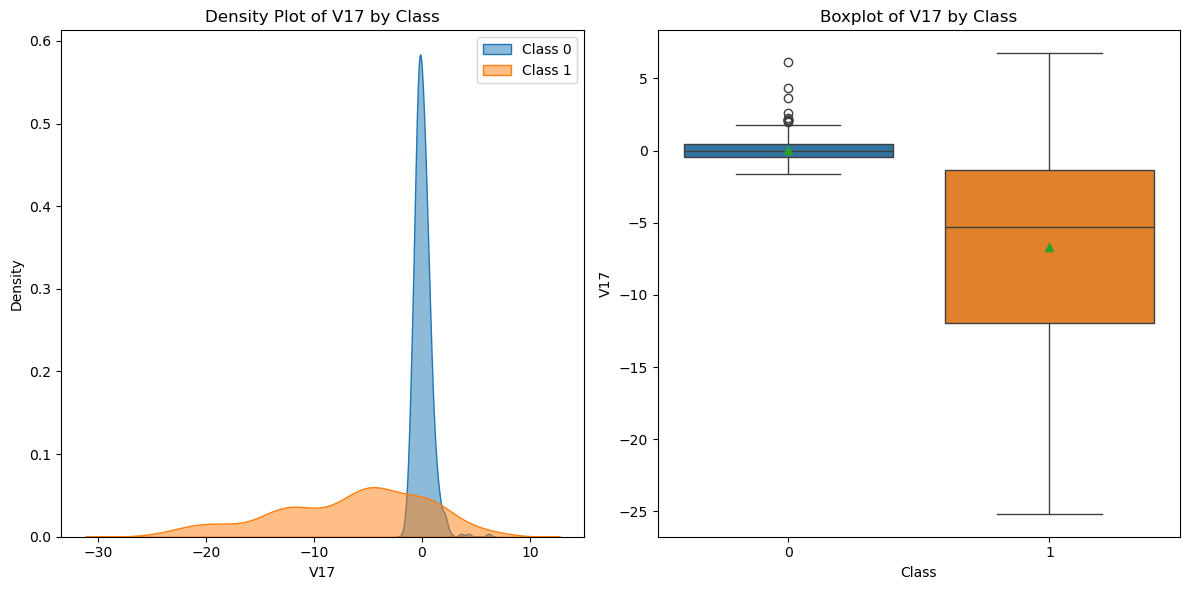

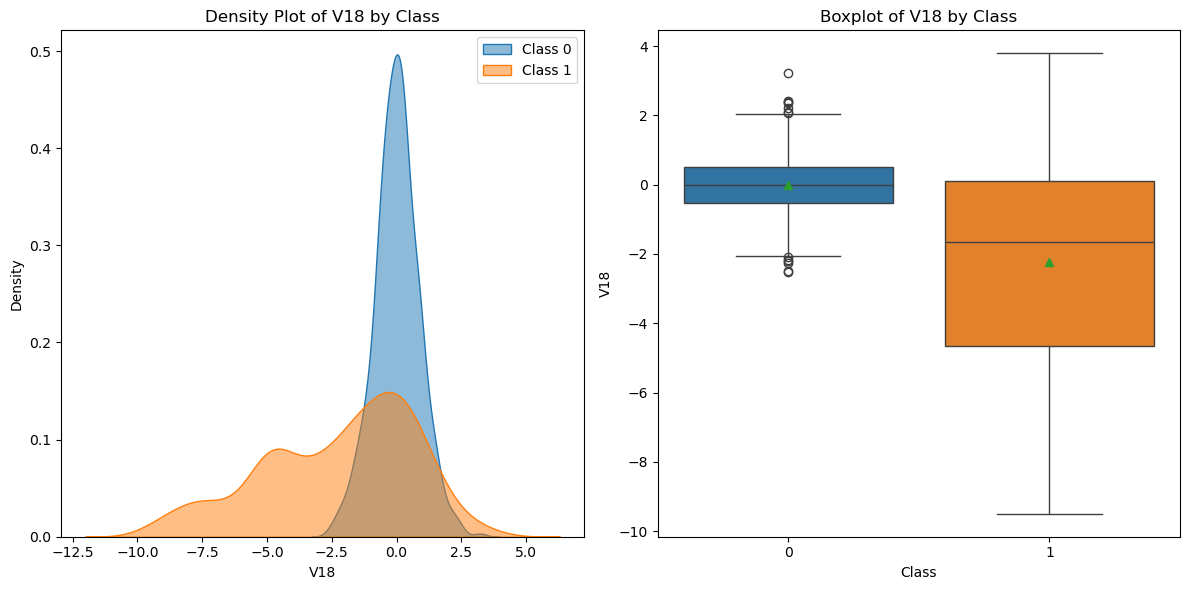

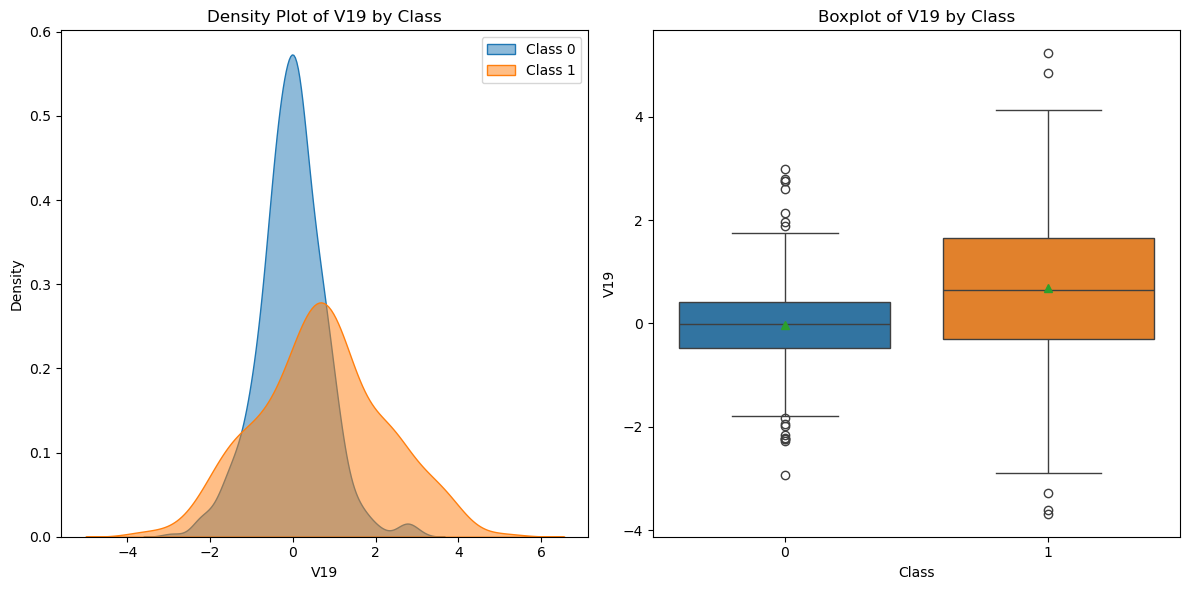

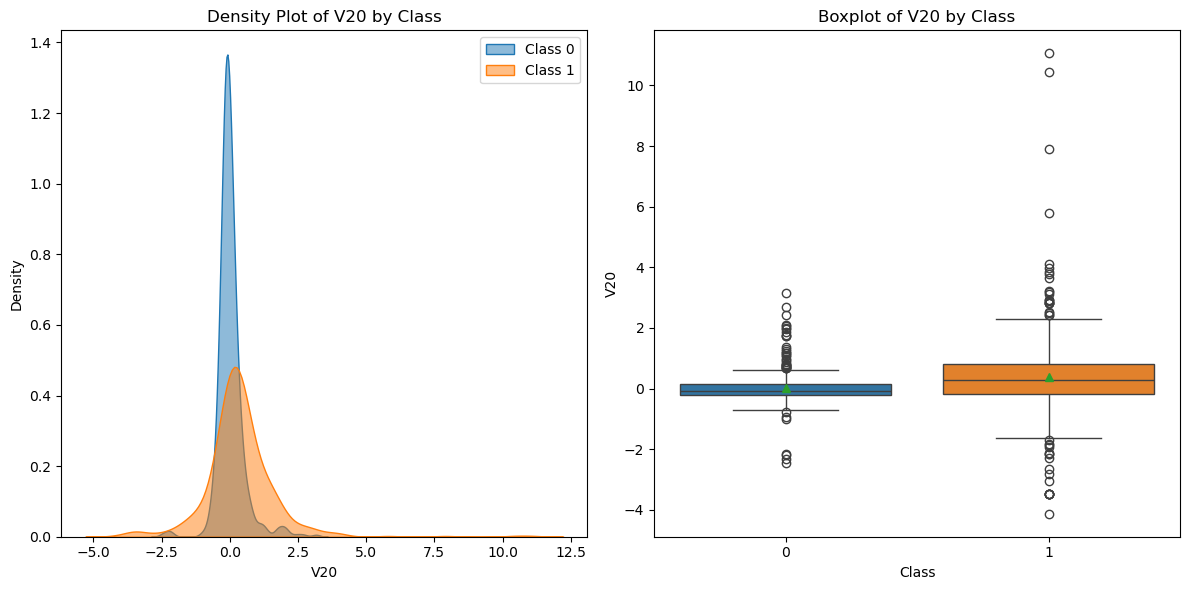

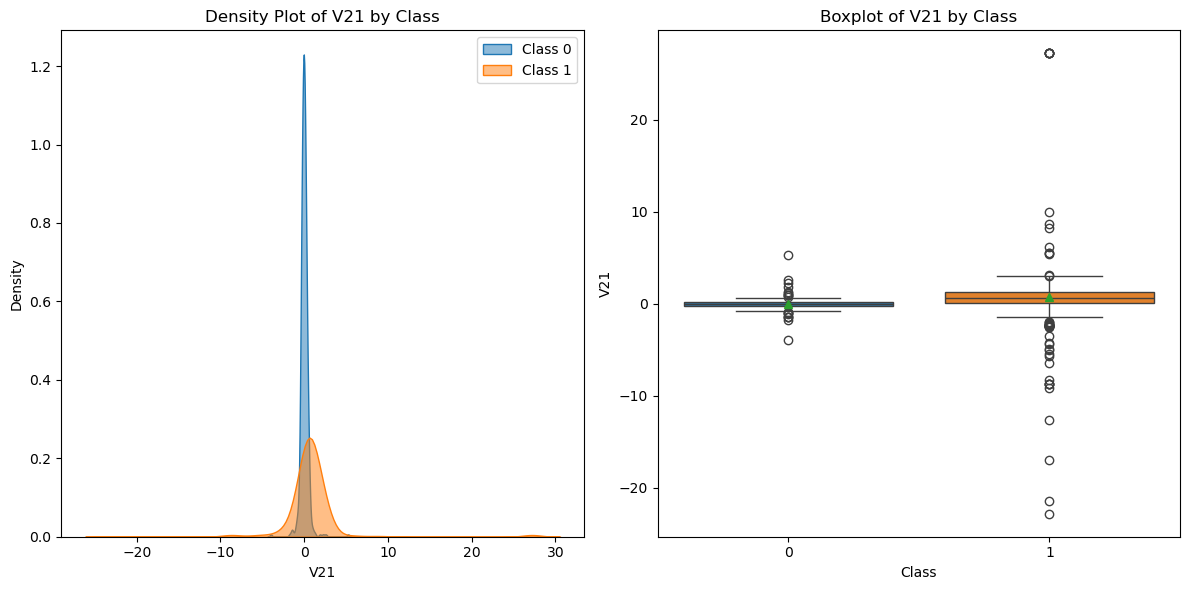

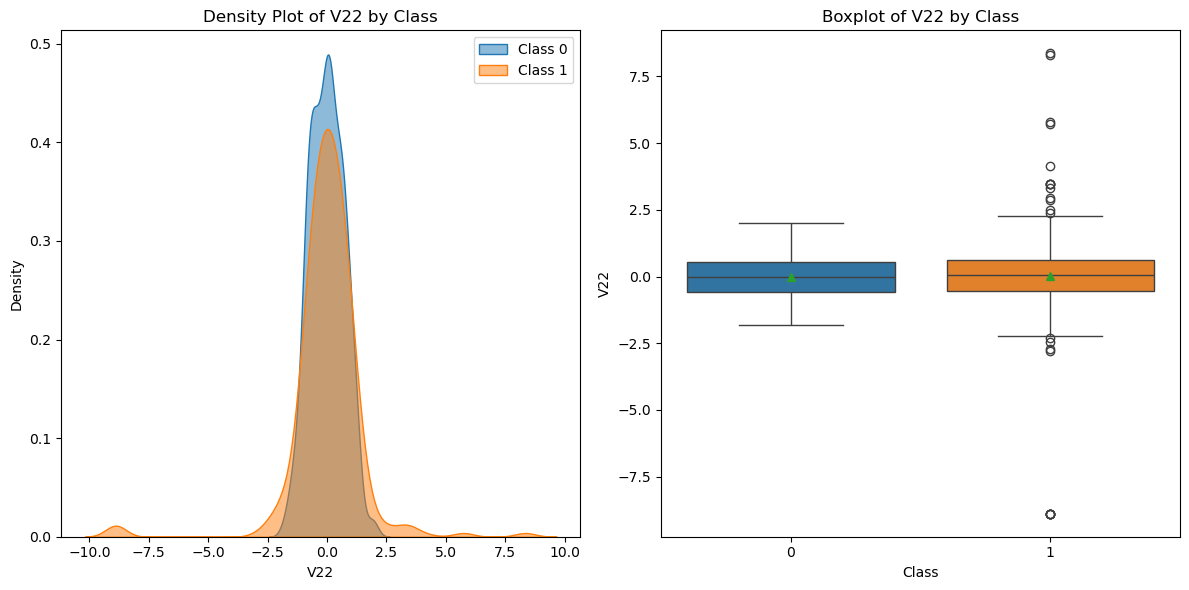

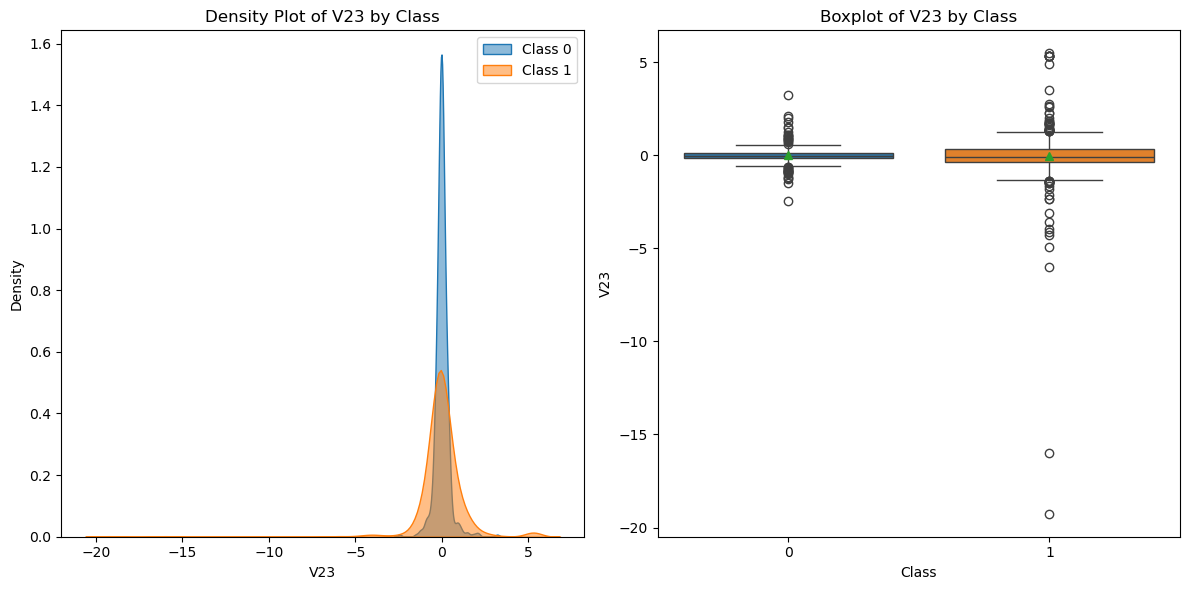

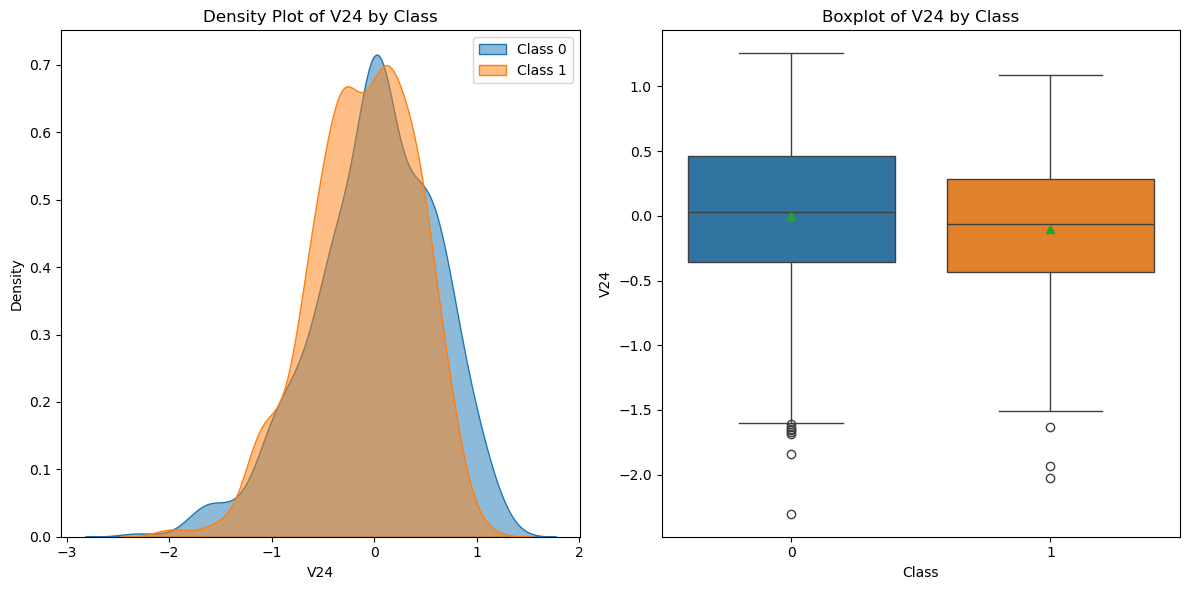

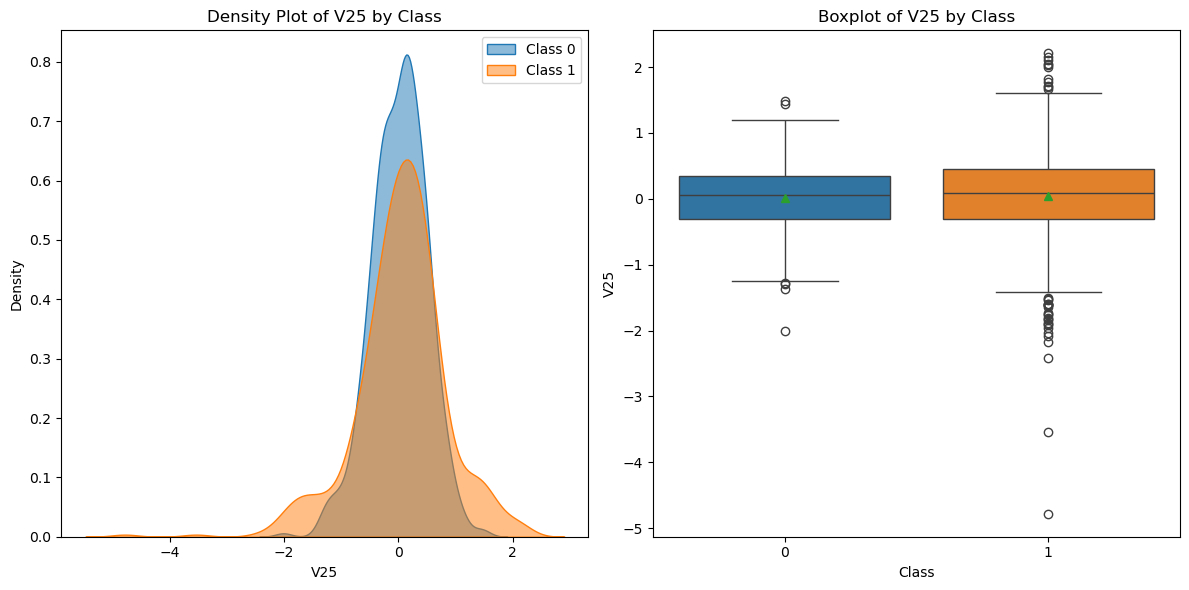

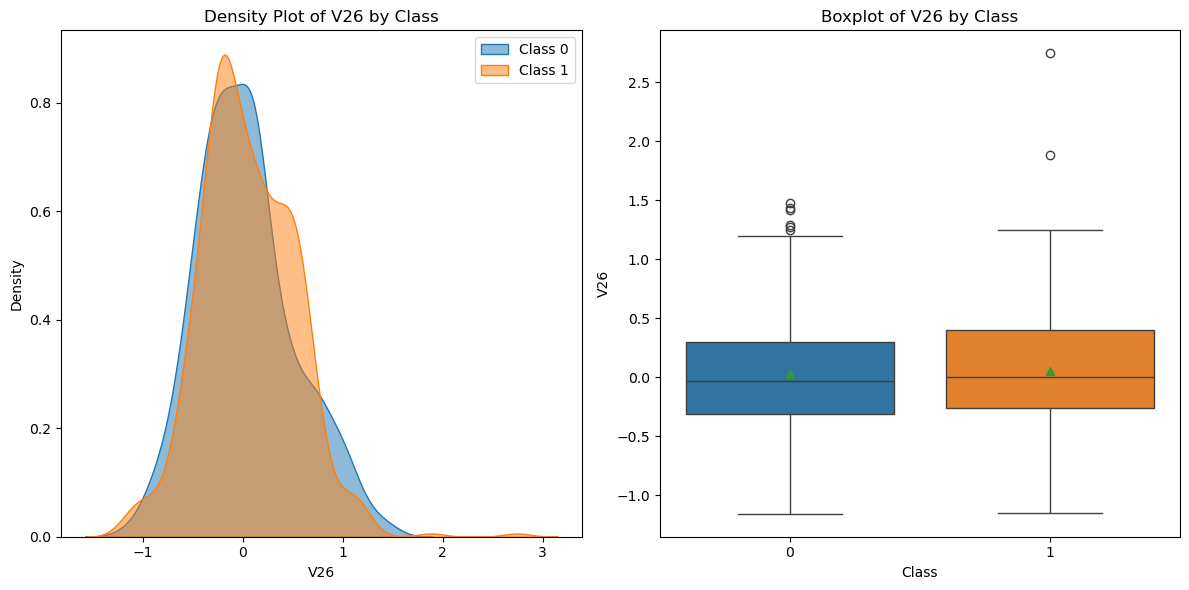

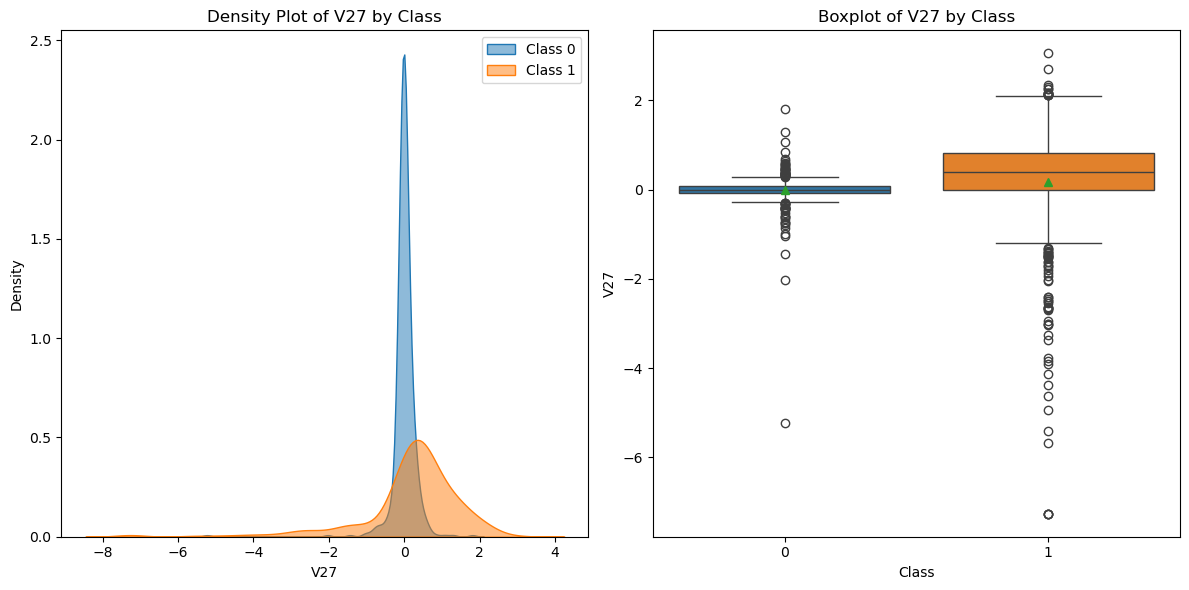

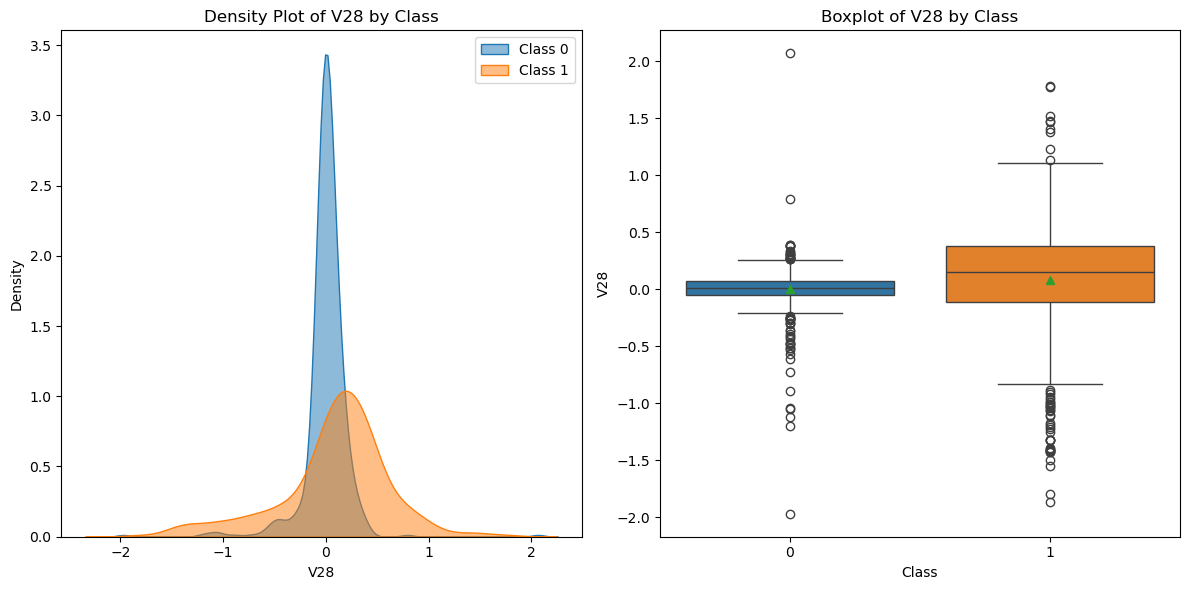

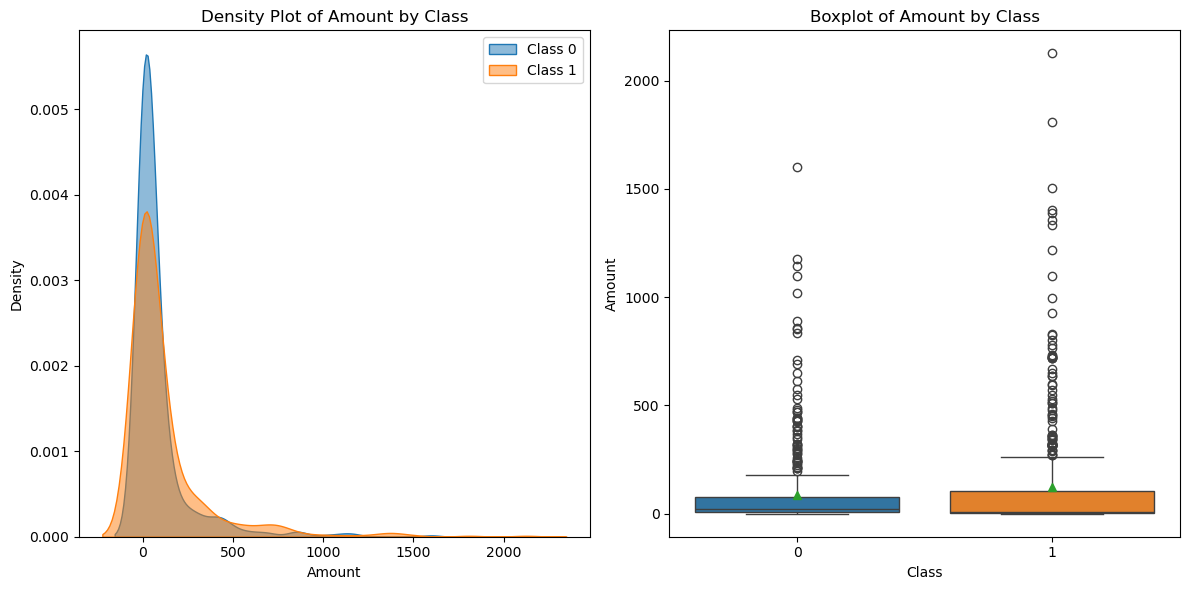

In [21]:
# split data to fraud and non-fraud
balanced_sample_df_class0= balanced_sample_df.filter(pl.col("Class")==0)
balanced_sample_df_class1= balanced_sample_df.filter(pl.col("Class")==1)

for feature in df.select(cs.contains(("V","Time","Amount"))).columns:
    # Overlayed density plots for the same feature
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    sns.kdeplot(ax = ax1, data=balanced_sample_df_class0[feature], label='Class 0', fill=True, alpha=0.5)
    sns.kdeplot(ax = ax1, data=balanced_sample_df_class1[feature], label='Class 1', fill=True, alpha=0.5)
    ax1.set_title(f"Density Plot of {feature} by Class")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Density")
    ax1.legend()
    # Boxplots
    s = sns.boxplot(ax = ax2, x="Class", y= feature, data=balanced_sample_df, showmeans=True,hue= "Class", legend= False)
    ax2.set_title(f"Boxplot of {feature} by Class")
    plt.tight_layout()
    plt.show()

## Temporal analysis

In [22]:
# transform seconds to hour
df= df.with_columns(
    (pl.col("Time")/3600).cast(pl.Int32)
    .alias("Hour")
)

agg_df= df.group_by(['Hour', 'Class']).agg(
    [
        pl.col("Amount").len().alias("transaction_count"),
        pl.col("Amount").min().alias("min_transaction"),
        pl.col("Amount").max().alias("max_transaction"),
        pl.col("Amount").mean().alias("mean_transaction"),
        pl.col("Amount").median().alias("median_transaction"),
        pl.col("Amount").sum().alias("total_transaction"),
        pl.col("Amount").var().alias("variance"),
    ]
)
agg_df

shape: (94, 9)
┌──────┬───────┬─────────────┬─────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ Hour ┆ Class ┆ transaction ┆ min_transac ┆ … ┆ mean_trans ┆ median_tra ┆ total_tran ┆ variance   │
│ ---  ┆ ---   ┆ _count      ┆ tion        ┆   ┆ action     ┆ nsaction   ┆ saction    ┆ ---        │
│ i32  ┆ i64   ┆ ---         ┆ ---         ┆   ┆ ---        ┆ ---        ┆ ---        ┆ f64        │
│      ┆       ┆ u32         ┆ f64         ┆   ┆ f64        ┆ f64        ┆ f64        ┆            │
╞══════╪═══════╪═════════════╪═════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 12   ┆ 1     ┆ 9           ┆ 1.0         ┆ … ┆ 24.987778  ┆ 1.0        ┆ 224.89     ┆ 1748.04859 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 4          │
│ 41   ┆ 0     ┆ 8267        ┆ 0.0         ┆ … ┆ 91.321536  ┆ 21.95      ┆ 754955.14  ┆ 62211.3134 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 77         │
│ 44   ┆ 1     ┆ 10          ┆ 0.38        ┆ … ┆ 63.716     ┆ 4.795      ┆ 637.16     ┆ 9959.86549 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 3          │
│ 10   ┆ 0     ┆ 8286        ┆ 0.0         ┆ … ┆ 111.623966 ┆ 35.0       ┆ 924916.18  ┆ 72106.3240 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 43         │
│ 2    ┆ 1     ┆ 21          ┆ 1.0         ┆ … ┆ 87.132381  ┆ 1.0        ┆ 1829.78    ┆ 155776.441 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 219        │
│ …    ┆ …     ┆ …           ┆ …           ┆ … ┆ …          ┆ …          ┆ …          ┆ …          │
│ 17   ┆ 1     ┆ 12          ┆ 0.0         ┆ … ┆ 243.031667 ┆ 12.83      ┆ 2916.38    ┆ 180018.846 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 942        │
│ 30   ┆ 0     ┆ 2264        ┆ 0.0         ┆ … ┆ 54.551899  ┆ 10.595     ┆ 123505.5   ┆ 45060.7839 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 6          │
│ 35   ┆ 1     ┆ 10          ┆ 0.0         ┆ … ┆ 117.69     ┆ 46.45      ┆ 1176.9     ┆ 48061.6445 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 33         │
│ 20   ┆ 0     ┆ 8972        ┆ 0.0         ┆ … ┆ 76.463752  ┆ 19.575     ┆ 686032.78  ┆ 43162.3664 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 66         │
│ 44   ┆ 0     ┆ 7766        ┆ 0.0         ┆ … ┆ 72.306195  ┆ 17.12      ┆ 561529.91  ┆ 35829.9278 │
│      ┆       ┆             ┆             ┆   ┆            ┆            ┆            ┆ 11         │
└──────┴───────┴─────────────┴─────────────┴───┴────────────┴────────────┴────────────┴────────────┘

.......Plotting transaction_count vs hour.......... 


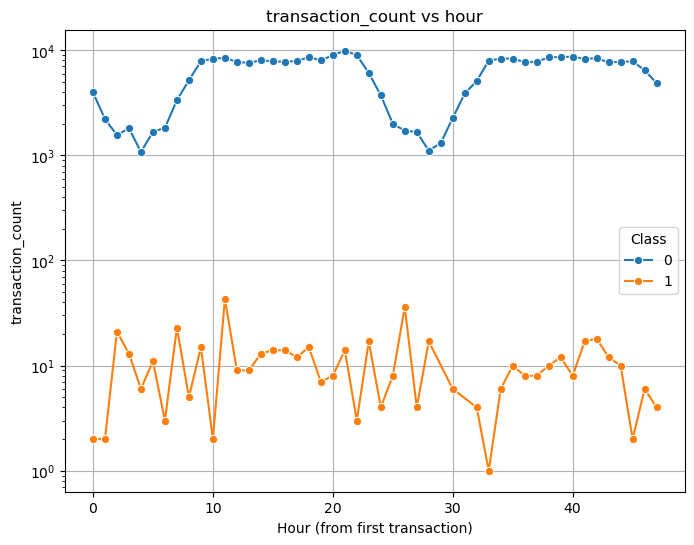

.......Plotting min_transaction vs hour.......... 


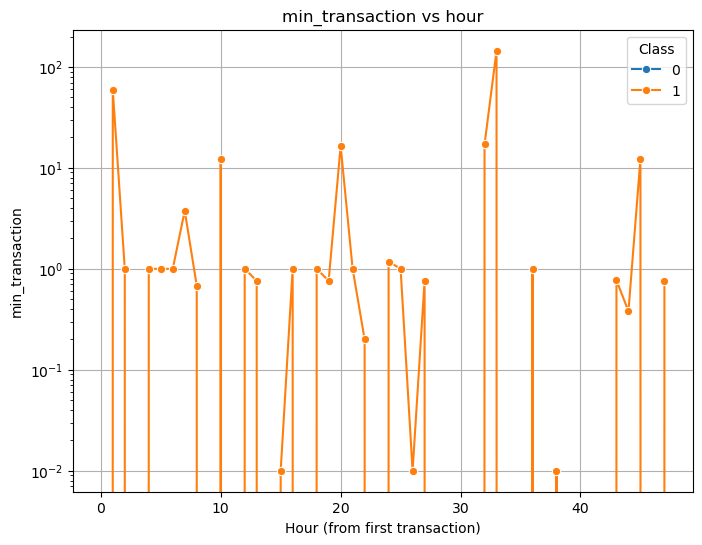

.......Plotting max_transaction vs hour.......... 


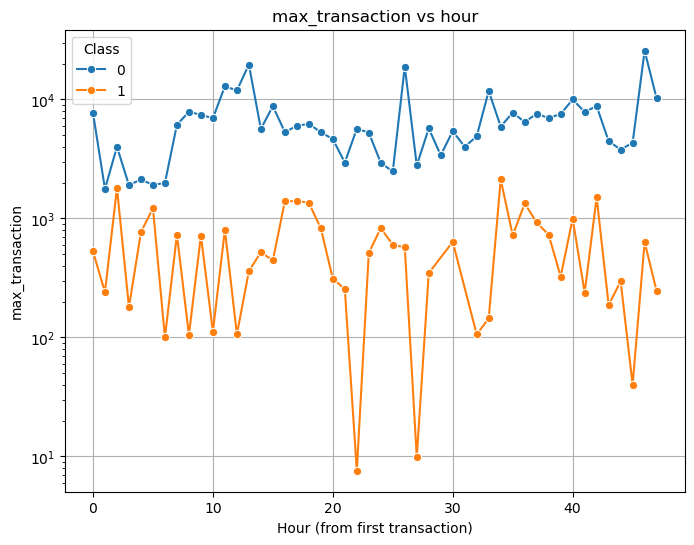

.......Plotting mean_transaction vs hour.......... 


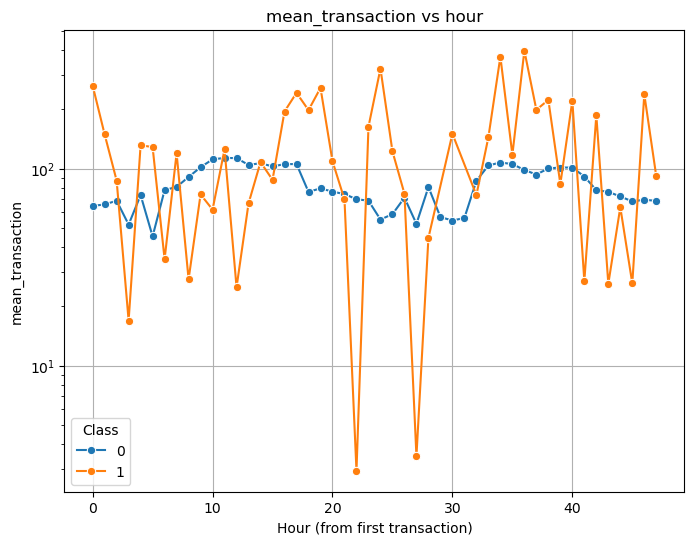

.......Plotting median_transaction vs hour.......... 


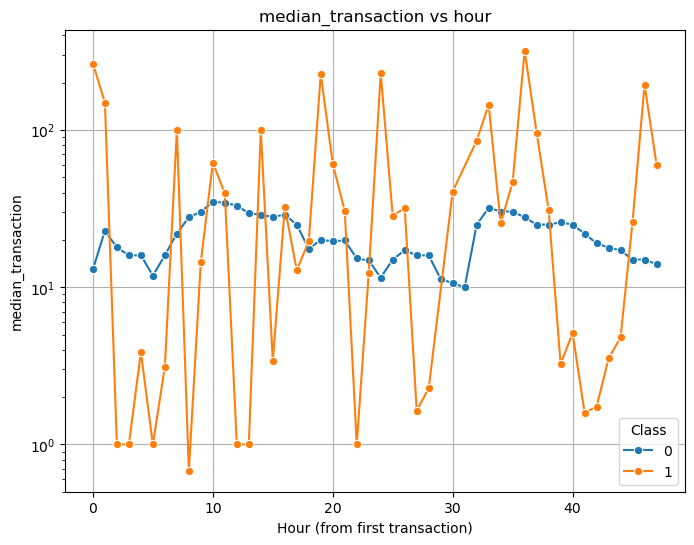

.......Plotting total_transaction vs hour.......... 


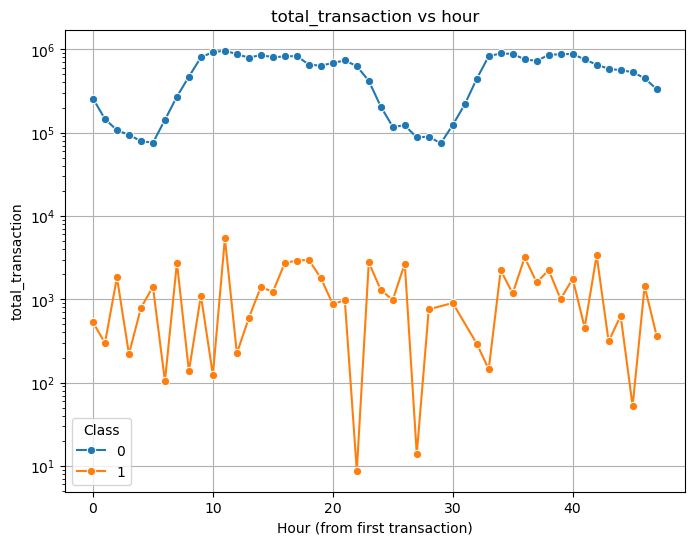

In [23]:
def plot_transaction_amount_per_class(df, y, x= "Hour",target= "Class"):
    print(f".......Plotting {y} vs hour.......... ")
    plt.figure(figsize=(8, 6))
    sns.lineplot(data= agg_df, x= x, y=y, hue= target, marker="o")
    plt.title(f"{y} vs hour")
    plt.xlabel("Hour (from first transaction)")
    plt.ylabel(f"{y}")
    plt.yscale("log")
    plt.grid(True)
    # Adjust layout for better spacing
    # plt.tight_layout()
    # Show the plot
    plt.show()

for col in agg_df.select(cs.contains("transaction")).columns:
    plot_transaction_amount_per_class(agg_df, col)

### Detect outlier and anomalies
Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes.

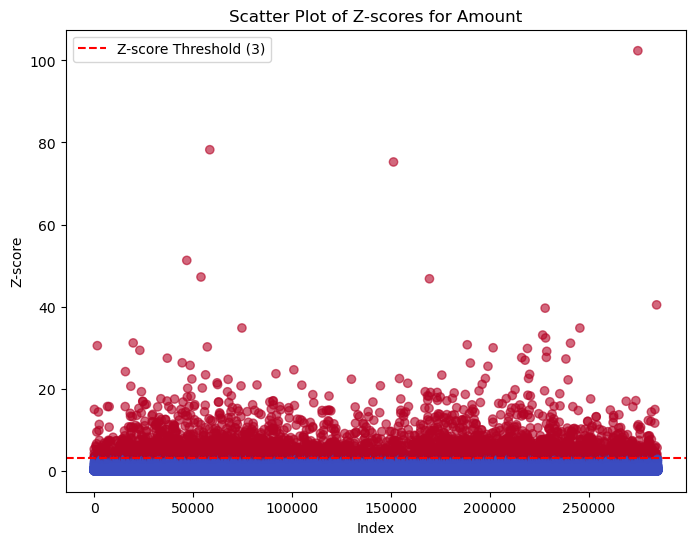

Number of IQR-based outliers with factor 3 in 'Amount': 18939
Number of Z-score-based outliers in 'Amount': 4076


shape: (18_939, 3)
┌────────┬────────────────┬───────────────────┐
│ index  ┆ Is_IQR_Outlier ┆ Is_Zscore_Outlier │
│ ---    ┆ ---            ┆ ---               │
│ u32    ┆ bool           ┆ bool              │
╞════════╪════════════════╪═══════════════════╡
│ 2      ┆ true           ┆ false             │
│ 51     ┆ true           ┆ true              │
│ 89     ┆ true           ┆ true              │
│ 134    ┆ true           ┆ false             │
│ 140    ┆ true           ┆ true              │
│ …      ┆ …              ┆ …                 │
│ 284716 ┆ true           ┆ false             │
│ 284732 ┆ true           ┆ false             │
│ 284733 ┆ true           ┆ false             │
│ 284735 ┆ true           ┆ false             │
│ 284753 ┆ true           ┆ false             │
└────────┴────────────────┴───────────────────┘

In [24]:
flag_outliers(df= df, factor= 3, feature= "Amount")

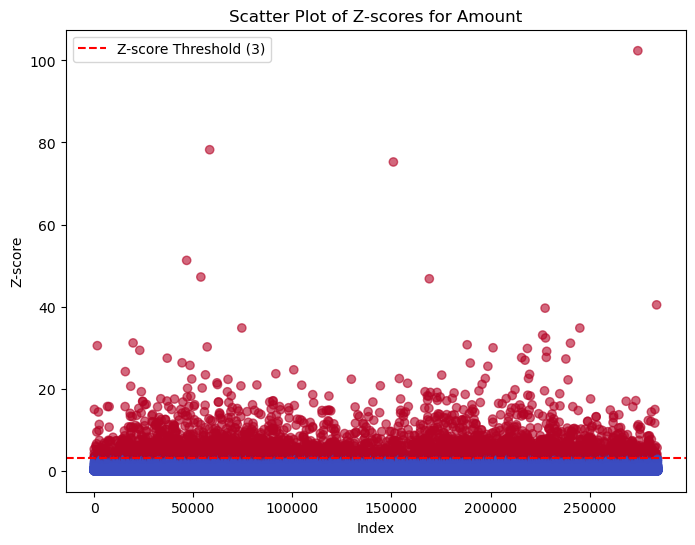

Number of IQR-based outliers with factor 3 in 'Amount': 18910
Number of Z-score-based outliers in 'Amount': 4066


shape: (18_910, 3)
┌────────┬────────────────┬───────────────────┐
│ index  ┆ Is_IQR_Outlier ┆ Is_Zscore_Outlier │
│ ---    ┆ ---            ┆ ---               │
│ u32    ┆ bool           ┆ bool              │
╞════════╪════════════════╪═══════════════════╡
│ 2      ┆ true           ┆ false             │
│ 51     ┆ true           ┆ true              │
│ 89     ┆ true           ┆ true              │
│ 134    ┆ true           ┆ false             │
│ 140    ┆ true           ┆ true              │
│ …      ┆ …              ┆ …                 │
│ 284224 ┆ true           ┆ false             │
│ 284240 ┆ true           ┆ false             │
│ 284241 ┆ true           ┆ false             │
│ 284243 ┆ true           ┆ false             │
│ 284261 ┆ true           ┆ false             │
└────────┴────────────────┴───────────────────┘

In [25]:
flag_outliers(df= df_class0, factor= 3, feature= "Amount")

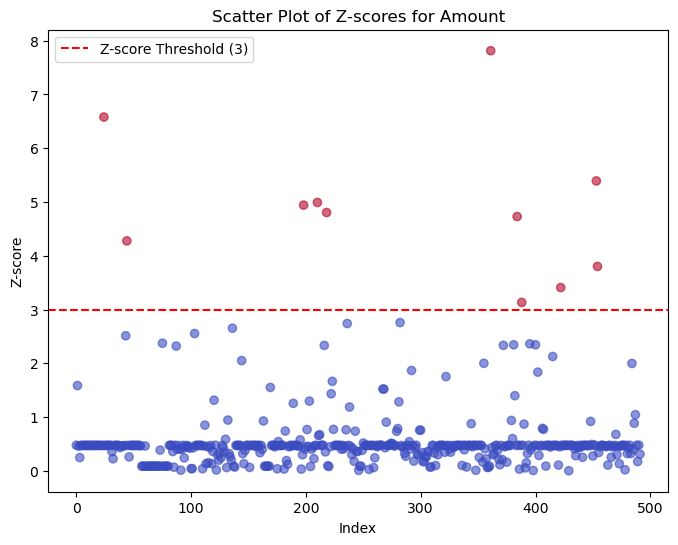

Number of IQR-based outliers with factor 3 in 'Amount': 42
Number of Z-score-based outliers in 'Amount': 11


shape: (42, 3)
┌───────┬────────────────┬───────────────────┐
│ index ┆ Is_IQR_Outlier ┆ Is_Zscore_Outlier │
│ ---   ┆ ---            ┆ ---               │
│ u32   ┆ bool           ┆ bool              │
╞═══════╪════════════════╪═══════════════════╡
│ 1     ┆ true           ┆ false             │
│ 24    ┆ true           ┆ true              │
│ 43    ┆ true           ┆ false             │
│ 44    ┆ true           ┆ true              │
│ 75    ┆ true           ┆ false             │
│ …     ┆ …              ┆ …                 │
│ 415   ┆ true           ┆ false             │
│ 422   ┆ true           ┆ true              │
│ 453   ┆ true           ┆ true              │
│ 454   ┆ true           ┆ true              │
│ 484   ┆ true           ┆ false             │
└───────┴────────────────┴───────────────────┘

In [26]:
flag_outliers(df= df_class1, factor= 3, feature= "Amount")

In [27]:
# # Optionally, plot pairplot for a subset of features (e.g., the first 4 principal components and Class)
# subset_features = ["V2", "V5", "V7", "V20", "V3","Class"]
# sns.pairplot(df[subset_features].to_pandas(), hue="Class", diag_kind="kde", corner=True)
# plt.suptitle("Pairplot for Selected Features", y=1.02)
# plt.show()

## Uniform Manifold Approximation and Projection (UMAP)
- Similar to t-SNE but faster and more flexible.
- We want to visualize complex feature space in 2D.
- We want to see clusters or separation between classes. Works great on imbalanced data to see if the minority class is forming its own cluster.


In [23]:
balanced_sample_df_copy= balanced_sample_df.clone()
balanced_sample_df= balanced_sample_df.to_pandas()

- Since we have large scale learning (n_samples > 10k) MiniBatchKMeans is probably much faster than KMeans.
- Also UMAP is generally much faster than t-SNE and works well with large datasets.
    - Side note: It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

### Clustering

In [29]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Assume X_scaled is your data (for example, using V1-V28 features standardized)
# # For demonstration, let's assume X_scaled is already defined.
# scaler= StandardScaler()
# X_scaled = scaler.fit_transform(df[pc_columns])

# inertia_values = []
# silhouette_scores = []
# cluster_range = range(2, 11)  # Evaluate from 2 to 10 clusters

# for k in cluster_range:
#     kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=BATCH_SIZE)
#     labels = kmeans.fit_predict(X_scaled)
#     inertia_values.append(kmeans.inertia_)
#     # score = silhouette_score(X_scaled, labels)
#     # silhouette_scores.append(score)
#     # print(f"For k={k}, Inertia={kmeans.inertia_:.2f}, Silhouette Score={score:.2f}")

# # Plot the inertia values (Elbow Method)
# plt.figure(figsize=(14, 6))
# plt.subplot(1, 2, 1)
# plt.plot(cluster_range, inertia_values, marker='o')
# plt.title("Elbow Method: Inertia vs. Number of Clusters")
# plt.xlabel("Number of clusters")
# plt.ylabel("Inertia")

# # # Plot the silhouette scores
# # plt.subplot(1, 2, 2)
# # plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
# # plt.title("Silhouette Score vs. Number of Clusters")
# # plt.xlabel("Number of clusters")
# # plt.ylabel("Silhouette Score")
# # plt.tight_layout()
# # plt.show()

# # # Determine the best number of clusters based on the highest silhouette score
# # best_k = cluster_range[np.argmax(silhouette_scores)]
# # print("Best number of clusters based on silhouette score:", best_k)


In [30]:
# # Optional: Subsample the data if it's large to speed up computation
# # sample_size = 500000
# # if len(df) > sample_size:
# #     df_sample = df.sample(n=sample_size, random_state=42)
# # else:
# #     df_sample = df.copy()

# df_sample= balanced_sample_df
# # Use V1 to V28 as the feature set (they are already the principal components)
# pc_columns = [f"V{i}" for i in range(1, 29)]
# X = df_sample[pc_columns+ ["Amount"]]
# # -------------------------------
# # Clustering using KMeans
# # -------------------------------
# N_CLUSTER= 2
# BATCH_SIZE= 1000

# # Create a pipeline with standardization and clustering
# kmeans_pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize features (optional, but often useful for clustering)
#     ('kmeans', MiniBatchKMeans(n_clusters=N_CLUSTER, random_state=42, batch_size=BATCH_SIZE))
# ])
# # Fit and predict clusters
# clusters = kmeans_pipeline.fit_predict(X)
# df_sample['Cluster'] = clusters

In [31]:
# df_sample['Cluster'].value_counts(normalize=True)

In [32]:
# from sklearn.metrics import silhouette_score
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# # mean Silhouette Coefficient of all samples.
# score = silhouette_score(X_scaled, df_sample['Cluster'])
# print(f"Silhouette Score for the clustering: {score:.2f}")

#### Dimensionality Reduction using UMAP for visualization


In [26]:
# to reduce computational cost, we take a sample from our data

RATIO_TO_FRAUD = 15
df_sample= pl.concat(
    [df_fraud, df_non_fraud.sample(n=sample_size*RATIO_TO_FRAUD, seed=42, shuffle=True)]
)
print(f"Sample data dimension: {df_sample.shape}")
df_sample= df_sample.to_pandas()
X = df_sample.drop(["Class","Time"], axis=1)

Sample data dimension: (7872, 31)


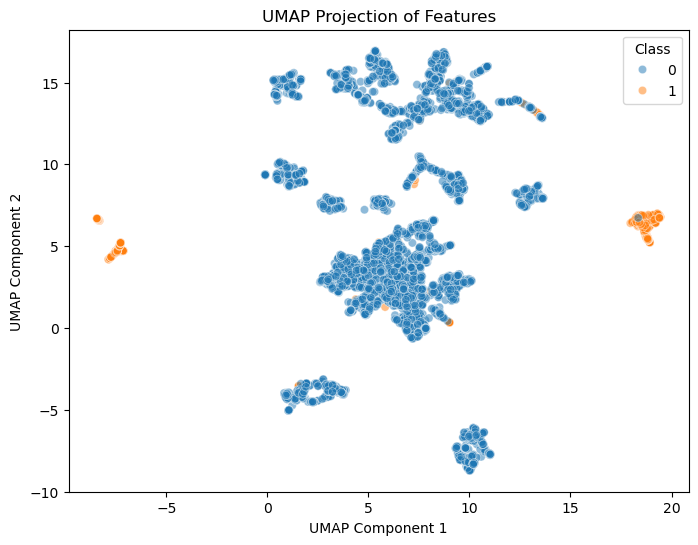

In [27]:
# Column groups
# Use V1 to V28 as the feature set (they are already the principal components)
pc_columns = [f"V{i}" for i in range(1, 29)]
standard_scale_features = pc_columns #+ ["Time"]
robust_scale_feature = ['Amount']

standard_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
robust_pipeline = Pipeline([
    ('scaler', RobustScaler())
])
preprocessor = ColumnTransformer([
    # ('num1', standard_pipeline, standard_scale_features),
    ('num2', robust_pipeline, robust_scale_feature)
], remainder='passthrough')
umap_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('umap', umap.UMAP(n_components=2, random_state=42))
])
umap_embedding= umap_pipeline.fit_transform(X)

df_sample['umap_1'] = umap_embedding[:, 0]
df_sample['umap_2'] = umap_embedding[:, 1]
# Plot the UMAP visualization with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umap_1', y='umap_2', hue='Class', data=df_sample, alpha=0.5)
plt.title("UMAP Projection of Features")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Class")
plt.show()

- In the UMAP plot above, each point represents a transaction mapped into 2D space.
- You can observe that the points form two classes (colored differently).
- A well-separated cluster might indicate that these transactions have distinct characteristics.


- f you observe a clear separation between two clusters, it’s an opportunity to gain valuable insights into your data. Here are some steps you might consider:

    Investigate Cluster Characteristics:
        Examine Summary Statistics: Compare means, medians, and variances of features between the clusters. This can help identify which features drive the separation.
        Distribution Plots: Create histograms, boxplots, or KDE plots for key features in each cluster to understand the differences.
        Check Class Distribution: In fraud detection, verify if one cluster has a higher concentration of fraud cases. It might be that one cluster represents the majority (normal transactions) and the other, a minority (fraud).

    Validate Clustering Quality:
        Silhouette Score or Other Metrics: Compute clustering metrics like the silhouette score to quantify how well-separated the clusters are.
        Examine Cluster Sizes: Ensure that the separation is not just due to a very small cluster (which might be noise) or an artifact of the clustering algorithm.

    Feature Engineering and Model Implications:
        Tailor Feature Engineering: Use the insights from cluster differences to engineer or select features that enhance your model’s predictive power.
        Modeling: Consider incorporating the cluster label as an additional feature in your predictive models, or even developing separate models for different clusters if the behavior is distinct.

    Domain Context and Further Investigation:
        Business Understanding: In fraud detection, a clear cluster separation might suggest distinct transaction behaviors. Consult with domain experts to interpret if one cluster represents potentially fraudulent activity.
        Investigate Anomalies: Look at individual cases within the smaller or distinct cluster to validate if they are truly anomalous or if further data cleaning/feature refinement is needed.

# Modeling

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X= df.drop(["Class","Time"], axis=1)
input_dim = X.shape[1]
y = df["Class"]

In [6]:
# non fraud
X_normal= X[y == 0]
y_normal= y[y == 0]
# fraud
X_fraud= X[y == 1]
y_fraud= y[y == 1]

In [47]:
# # df= df.to_pandas()
# Train only on majority class (0)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_normal, y_normal, test_size=0.2, random_state=42
)
X_val, X_test_normal, y_val, y_test_normal= train_test_split(
    X_temp, y_temp, test_size=0.8, random_state=42)

# create the test set from all fraud+ remaining non-fraud
X_test= pd.concat([X_test_normal, X_fraud], axis=0)
y_test= pd.concat([y_test_normal, y_fraud], axis=0)

In [48]:
print(f" Training set dim: {X_train.shape}")
print(f" Eval set dim: {X_val.shape}")
print(f" Tets set dim: {X_test.shape}")

 Training set dim: (227452, 29)
 Eval set dim: (11372, 29)
 Tets set dim: (45983, 29)


In [49]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.int64)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.int64)

train_loader = DataLoader(
    TensorDataset(X_train_tensor,y_train_tensor), batch_size=64, shuffle=True
)

test_loader = DataLoader(
    TensorDataset(X_test_tensor, y_test_tensor), 
    batch_size=64, shuffle=False
)

In [50]:
test_loader.dataset.tensors

(tensor([[ 1.0076, -0.1768, -0.6421,  ..., -0.2076, -0.1455, -0.2365],
         [ 0.6112,  0.1801,  0.3461,  ..., -0.1114,  0.0613, -0.3425],
         [ 0.9935, -0.3000, -0.8137,  ..., -0.1111, -0.1660, -0.1911],
         ...,
         [-0.3541,  0.6912, -1.5224,  ...,  0.9713,  0.5792, -0.0424],
         [-1.6154,  0.3610, -3.7026,  ...,  2.2288, -0.7559,  0.6272],
         [ 1.0263,  0.0999, -1.7754,  ...,  0.0099, -0.0456, -0.1841]]),
 tensor([0, 0, 0,  ..., 1, 1, 1]))

In [51]:
# 3. Define Autoencoder model
class AutoEncoder(nn.Module):
    def __init__(self, input_dim):
        super(AutoEncoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        # latent
        encoded = self.encoder(x)
        # reconstructed
        decoded = self.decoder(encoded)
        return decoded


In [52]:
# 4. Initialize and train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")
model = AutoEncoder(input_dim=X_train.shape[1]).to(device)
print(model)

Using cuda device
AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=29, out_features=29, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=29, out_features=16, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=8, out_features=4, bias=True)
    (7): ELU(alpha=1.0)
    (8): Linear(in_features=4, out_features=2, bias=True)
    (9): ELU(alpha=1.0)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=8, out_features=16, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=16, out_features=29, bias=True)
    (7): ELU(alpha=1.0)
  )
)


In [53]:

size = len(train_loader.dataset)
size

227452

In [54]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [55]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# Initialize the loss function
loss_fn = nn.MSELoss()

In [56]:
# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # compute prediction and loss
        X_reconstructed = model(X)
        loss = loss_fn(X_reconstructed, X)
        # Zero gradients, perform a backward pass, and update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 1000 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [57]:
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss= 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            X_reconstructed = model(X)
            test_loss += loss_fn(X_reconstructed, X).item()

    test_loss /= num_batches
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")

In [58]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)



Epoch 1
-------------------------------
loss: 0.941744  [   64/227452]
loss: 0.596815  [64064/227452]
loss: 0.647389  [128064/227452]
loss: 1.025678  [192064/227452]
Test Error: 
 Avg loss: 1.068255 

Epoch 2
-------------------------------
loss: 0.697521  [   64/227452]
loss: 0.622403  [64064/227452]
loss: 0.765658  [128064/227452]
loss: 0.841571  [192064/227452]
Test Error: 
 Avg loss: 1.028669 

Epoch 3
-------------------------------
loss: 0.669097  [   64/227452]
loss: 0.867502  [64064/227452]
loss: 0.595078  [128064/227452]
loss: 0.599232  [192064/227452]
Test Error: 
 Avg loss: 1.011030 

Epoch 4
-------------------------------
loss: 0.598949  [   64/227452]
loss: 0.661556  [64064/227452]
loss: 0.574972  [128064/227452]
loss: 1.013030  [192064/227452]
Test Error: 
 Avg loss: 0.994516 

Epoch 5
-------------------------------
loss: 1.709270  [   64/227452]
loss: 0.799613  [64064/227452]
loss: 0.489823  [128064/227452]
loss: 0.985525  [192064/227452]
Test Error: 
 Avg loss: 0.9781

In [59]:
# anomaly detection
model.eval()
reconstruction_errors = []
actuals = []
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        X_reconstructed = model(X)
        test_loss = torch.mean((X_reconstructed - X) ** 2, dim=1)
        reconstruction_errors.extend(test_loss.cpu().numpy())
        actuals.extend(y.cpu().numpy())


Anomaly threshold: 0.3638

Classification Report (Autoencoder-based Anomaly Detection):
              precision    recall  f1-score   support

      Normal       1.00      0.41      0.58     45491
       Fraud       0.02      0.98      0.03       492

    accuracy                           0.42     45983
   macro avg       0.51      0.70      0.31     45983
weighted avg       0.99      0.42      0.58     45983



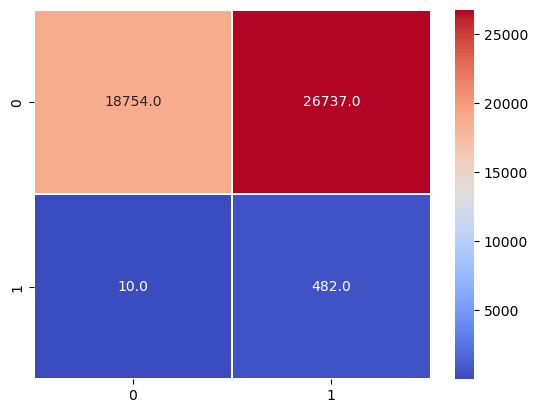

In [60]:
# Set a threshold for anomaly
threshold = np.percentile(reconstruction_errors[actuals==0], 98)  # adjust as needed
print(f"Anomaly threshold: {threshold:.4f}")

# predictions = [1 if e > threshold else 0 for e in reconstruction_errors]
predictions = (reconstruction_errors > threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(actuals, predictions),linewidths=.12,
    cmap="coolwarm",
    annot=True,
    fmt=".1f")

print("\nClassification Report (Autoencoder-based Anomaly Detection):")
print(classification_report(actuals, predictions, target_names=["Normal", "Fraud"]))

In [61]:
print(classification_report(actuals, predictions))

              precision    recall  f1-score   support

           0       1.00      0.41      0.58     45491
           1       0.02      0.98      0.03       492

    accuracy                           0.42     45983
   macro avg       0.51      0.70      0.31     45983
weighted avg       0.99      0.42      0.58     45983



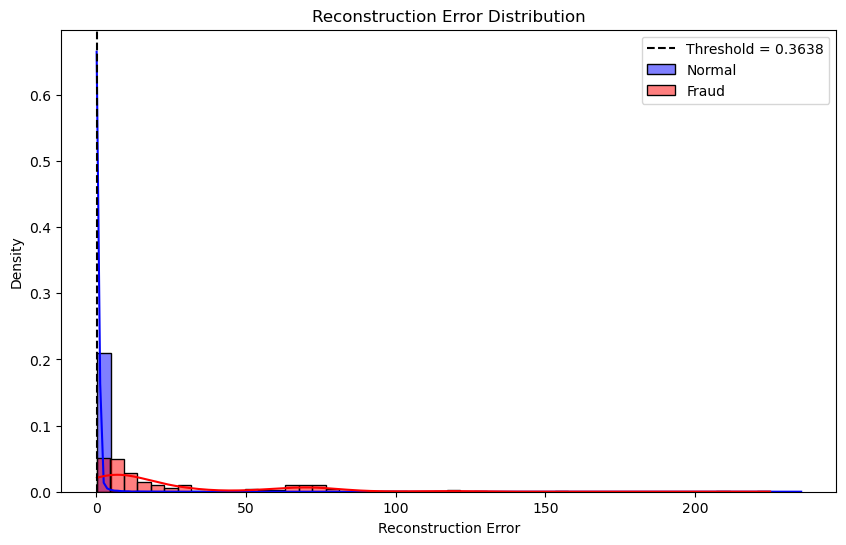

In [62]:
# Convert lists to numpy arrays
reconstruction_errors = np.array(reconstruction_errors)
actuals = np.array(actuals)

# 1. Plot Reconstruction Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_errors[actuals == 0], bins=50, label="Normal", color='blue', stat='density', kde=True)
sns.histplot(reconstruction_errors[actuals == 1], bins=50, label="Fraud", color='red', stat='density', kde=True)
plt.axvline(threshold, color='black', linestyle='--', label=f"Threshold = {threshold:.4f}")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.legend()
plt.show()

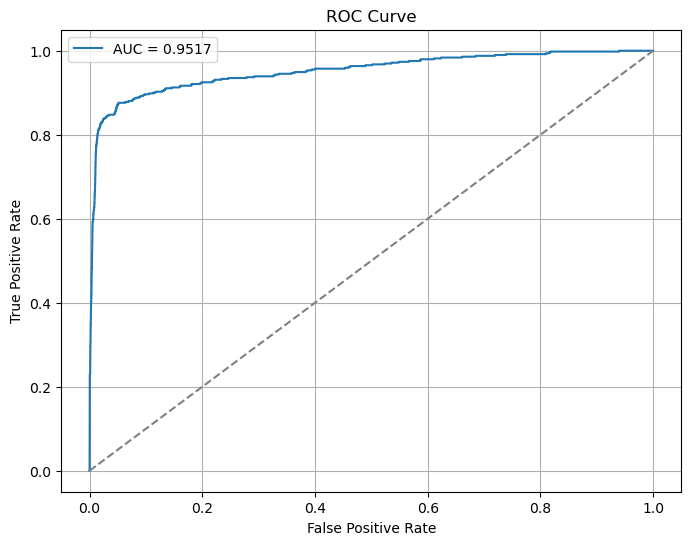

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(actuals, reconstruction_errors)
roc_auc = roc_auc_score(actuals, reconstruction_errors)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

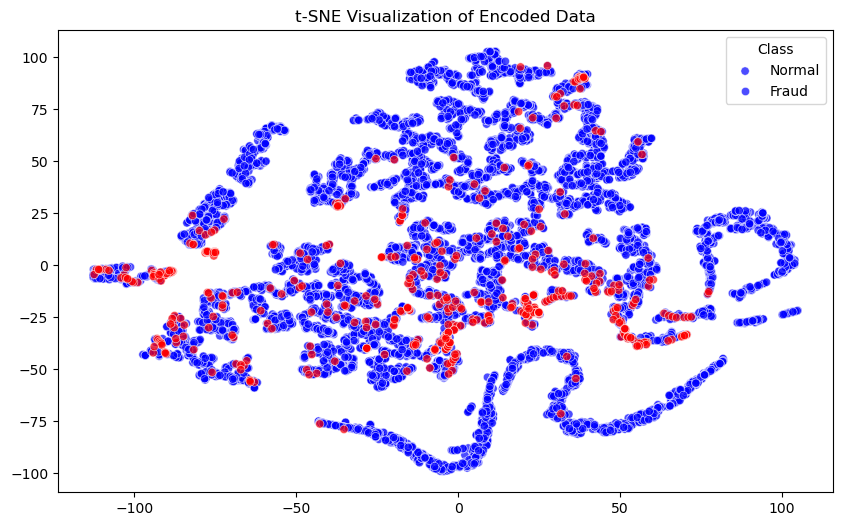

In [44]:
from sklearn.manifold import TSNE

# Get the latent (encoded) representations
encoded_data = []
labels = []

model.eval()
with torch.no_grad():
    for X,y in test_loader:
        X, y = X.to(device), y.to(device)
        encoded = model.encoder(X)
        encoded_data.append(encoded.cpu().numpy())
        labels.extend(y.cpu().numpy())

encoded_data = np.concatenate(encoded_data)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(encoded_data)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=labels, palette=['blue', 'red'], alpha=0.7)
plt.title("t-SNE Visualization of Encoded Data")
plt.legend(title='Class', labels=['Normal', 'Fraud'])
plt.show()